In [1]:
import sys
sys.path.append("../../geoVeRoPy")
import geoVeRoPy

### 1. Neighborhoods on Euclidean space

#### 1.1 Disk-shape neighborhoods

In [20]:
# nodes = geoVeRoPy.rndNodes(nodeIDs = [i for i in range(1, 6)])
# nodes = geoVeRoPy.rndNodeNeighbors(
#     nodes = nodes,
#     shape = 'Circle',
#     radius = 10
# )
nodes = geoVeRoPy.loadDictionary("test")

In [21]:
# geoVeRoPy.saveDictionary(nodes, 'test')

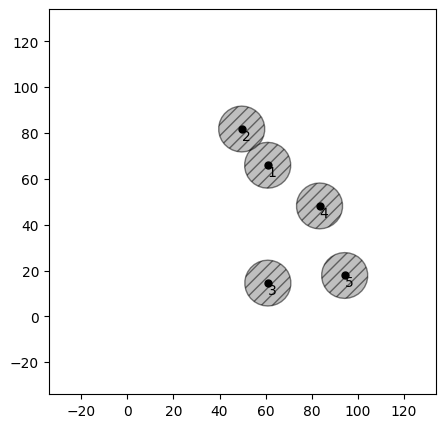

In [40]:
fig, ax = geoVeRoPy.plotNodes(
    nodes = nodes,
    nodeColor = 'black',
    nodeMarkerSize = 5,
    boundingBox = [-20, 120, -20, 120])

In [48]:
a = -float('inf')

In [49]:
a

-inf

In [41]:
rel = geoVeRoPy.relaxCETSP(
    startLoc = (50, 50),
    endLoc = (50, 50),
    nodes = nodes,
    seq = [0, 2, 5, 3, 4, 0])

[{'center': (49.61229169856038, 81.75141973617961), 'radius': 10}, {'center': (94.2607637169793, 17.835378783012878), 'radius': 10}, {'center': (60.94408819252427, 14.521222072487983), 'radius': 10}, {'center': (83.35914972923362, 48.19222591420347), 'radius': 10}]


In [42]:
rel.dist2NotInclude

{}

In [43]:
fig, ax = geoVeRoPy.plotLocSeq(
    fig = fig,
    ax = ax,
    lineColor = 'purple',
    locSeq = rel.path)

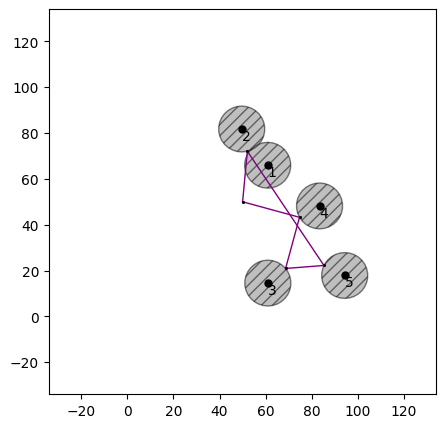

In [44]:
fig

In [11]:
seq = [2, 2, 1, 1, 4, 4, 5, 5, 3, 3]

In [12]:
circles = {}
for i in range(1, 6):
    circles[i] = {
        'center': nodes[i]['loc'],
        'radius': 10
    }
startLoc = (50, 50)
endLoc = (50, 50)
c2c = geoVeRoPy.c2cServicePathAdaptIter(
    startPt = startLoc, 
    endPt = endLoc, 
    seq = seq,
    velocity = 1,
    serviceTime = 5,
    circles = circles)

In [13]:
c2c

{'path': [(50, 50),
  (49.775909014825245, 71.75275835708399),
  (53.28745106450741, 72.45124749933949),
  (53.28854406740083, 72.45246106476006),
  (64.96375201600823, 56.81078928576809),
  (73.98575961010788, 44.70803911170913),
  (76.85845036332745, 40.59348208682601),
  (87.11775436802637, 24.833765557175276),
  (84.6230030590249, 20.502506357761863),
  (68.22873209700651, 21.372058750214986),
  (64.0031183934898, 24.041848849627225),
  (50, 50)],
 'travelTime': 139.68118455805666,
 'G': <networkx.classes.graph.Graph at 0x27b90a0b2b0>,
 'tau': {('s', (0, 2, 0)): 33.17452044809795,
  ('s', (0, 2, 1)): 37.67096847156655,
  ('s', (0, 2, 2)): 40.67402871527171,
  ('s', (0, 2, 3)): 41.75321984845784,
  ('s', (0, 2, 4)): 40.769238133175115,
  ('s', (0, 2, 5)): 37.848810749057286,
  ('s', (0, 2, 6)): 33.40744137192871,
  ('s', (0, 2, 7)): 28.24011473762743,
  ('s', (0, 2, 8)): 23.711375625411847,
  ('s', (0, 2, 9)): 21.754874816152565,
  ('s', (0, 2, 10)): 23.54729640575713,
  ('s', (0, 2

In [14]:
for g in c2c['G'].edges:
    print(g, c2c['G'].edges[g])

('s', (0, 2, 0)) {'weight': 33.17452044809795}
('s', (0, 2, 1)) {'weight': 37.67096847156655}
('s', (0, 2, 2)) {'weight': 40.67402871527171}
('s', (0, 2, 3)) {'weight': 41.75321984845784}
('s', (0, 2, 4)) {'weight': 40.769238133175115}
('s', (0, 2, 5)) {'weight': 37.848810749057286}
('s', (0, 2, 6)) {'weight': 33.40744137192871}
('s', (0, 2, 7)) {'weight': 28.24011473762743}
('s', (0, 2, 8)) {'weight': 23.711375625411847}
('s', (0, 2, 9)) {'weight': 21.754874816152565}
('s', (0, 2, 10)) {'weight': 23.54729640575713}
('s', (0, 2, 11)) {'weight': 28.00131194894569}
('s', (0, 2, 12)) {'weight': 22.291692891002988}
('s', (0, 2, 14)) {'weight': 21.90249885242496}
('s', (0, 2, 15)) {'weight': 21.85623966855497}
('s', (0, 2, 13)) {'weight': 22.20148013652505}
('s', (0, 2, 16)) {'weight': 21.797737715829417}
('s', (0, 2, 18)) {'weight': 21.768516017918568}
('s', (0, 2, 20)) {'weight': 21.75974393411891}
('s', (0, 2, 21)) {'weight': 21.75391258857413}
('s', (0, 2, 19)) {'weight': 21.75685802732

In [15]:
c2c['tau'][((0, 2, 0), (1, 2, 0))]

0.0

In [16]:
fig, ax = geoVeRoPy.plotLocSeq(
    fig = fig,
    ax = ax,
    lineColor = 'purple',
    locSeq = c2c['path'])

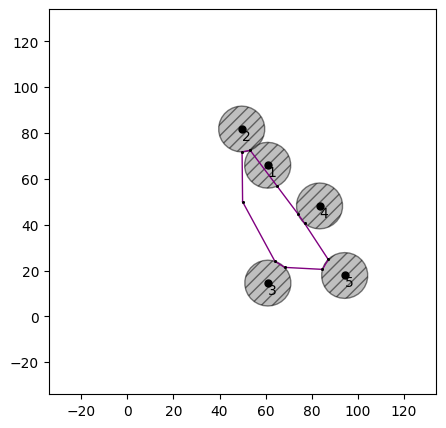

In [17]:
fig

In [6]:
geoVeRoPy.configSetError('deltaDist', 0.000001)

In [7]:
geoVeRoPy.ERRTOL

{'distPt2Pt': 0.01,
 'distPt2Seg': 0.02,
 'distPt2Poly': 0.03,
 'deltaDist': 1e-06,
 'collinear': 0.001,
 'slope2Slope': 0.001,
 'vertical': 0.001}

In [8]:
cetsp = geoVeRoPy.solveCETSP(
    startLoc = (50, 50),
    endLoc = (50, 50),
    nodes = nodes,
    neighbor = "Circle",
    radius = 10,
    algo = "Exact",
    c2cAlgo = 'AdaptIter',
    method = "GBD",
    cutSetting = {'paretoCut': True})



[0, 10, 1, 5, 9, 8, 2, 7, 6, 3, 4, 11]
---------------------------------------------------------------------------
Num of iter:  12
Residual: 115.0532172305529
Add default cut: - theta >= 19.678 * e[0, 10] + 0.945 * e[10, 1] + 5.148 * e[1, 5] + 1.848 * e[5, 9] + 24.922 * e[9, 8] + 8.407 * e[8, 2] + 1.214 * e[2, 7] + 22.825 * e[7, 6] + 11.02 * e[6, 3] + 1.028 * e[3, 4] + 18.019 * e[4, 11]
Time Pass: 0.22[s]
Cut: subtour - 19, gbc - 1
So far Best Dist: inf
CurrSol Dist: 214.71681616676693
CurrObj: 99.663598936214
CurrBound: 99.663598936214


[0, 4, 3, 6, 7, 2, 8, 9, 5, 1, 10, 11]
---------------------------------------------------------------------------
Num of iter:  12
Residual: 115.05321723055282
Add default cut: - theta >= 18.019 * e[0, 4] + 1.028 * e[4, 3] + 11.02 * e[3, 6] + 22.825 * e[6, 7] + 1.214 * e[7, 2] + 8.407 * e[2, 8] + 24.922 * e[8, 9] + 1.848 * e[9, 5] + 5.148 * e[5, 1] + 0.945 * e[1, 10] + 19.678 * e[10, 11]
Time Pass: 0.39[s]
Cut: subtour - 19, gbc - 2
So far Best Di

Num of iter:  11
Residual: 80.21466118166862
Add default cut: - theta >= 1.412 * e[0, 1] + 7.529 * e[1, 3] + 9.149 * e[3, 6] + 1.502 * e[6, 4] + 1.311 * e[4, 7] + 20.193 * e[7, 2] + 7.933 * e[2, 8] + 7.502 * e[8, 5] + 8.551 * e[5, 9] + 5.874 * e[9, 10] + 9.259 * e[10, 11]
Time Pass: 3.93[s]
Cut: subtour - 36, gbc - 15
So far Best Dist: 214.71681616676685
CurrSol Dist: 231.87768330249463
CurrObj: 199.64550438095213
CurrBound: 163.7509711637009


[0, 10, 1, 9, 5, 8, 7, 2, 6, 3, 4, 11]
---------------------------------------------------------------------------
Num of iter:  13
Residual: 88.79945236453833
Add default cut: - theta >= 19.663 * e[0, 10] + 0.885 * e[10, 1] + 6.058 * e[1, 9] + 0.001 * e[9, 5] + 7.664 * e[5, 8] + 10.598 * e[8, 7] + 3.833 * e[7, 2] + 9.791 * e[2, 6] + 11.262 * e[6, 3] + 1.025 * e[3, 4] + 18.018 * e[4, 11]
Time Pass: 4.41[s]
Cut: subtour - 36, gbc - 16
So far Best Dist: 214.71681616676685
CurrSol Dist: 215.76092734776353
CurrObj: 177.6502674578444
CurrBound: 163.7

Num of iter:  12
Residual: 85.29419893980922
Add default cut: - theta >= 18.018 * e[0, 4] + 1.025 * e[4, 3] + 11.256 * e[3, 6] + 9.817 * e[6, 2] + 4.36 * e[2, 7] + 9.98 * e[7, 9] + 0.823 * e[9, 8] + 3.535 * e[8, 5] + 5.897 * e[5, 1] + 0.914 * e[1, 10] + 19.67 * e[10, 11]
Time Pass: 8.85[s]
Cut: subtour - 44, gbc - 30
So far Best Dist: 214.71681616676685
CurrSol Dist: 228.23658327263504
CurrObj: 207.43226556075996
CurrBound: 165.43499879854954


[0, 1, 3, 4, 6, 2, 7, 8, 5, 9, 10, 11]
---------------------------------------------------------------------------
Num of iter:  9
Residual: 72.61812880233649
Add default cut: - theta >= 1.412 * e[0, 1] + 5.363 * e[1, 3] + 4.686 * e[3, 4] + 7.608 * e[4, 6] + 8.221 * e[6, 2] + 3.828 * e[2, 7] + 10.731 * e[7, 8] + 7.073 * e[8, 5] + 8.588 * e[5, 9] + 5.859 * e[9, 10] + 9.248 * e[10, 11]
Time Pass: 9.01[s]
Cut: subtour - 44, gbc - 31
So far Best Dist: 214.71681616676685
CurrSol Dist: 221.5154468746078
CurrObj: 189.02423989188392
CurrBound: 165.43499

Num of iter:  13
Residual: 80.51278654776493
Add default cut: - theta >= 1.697 * e[0, 3] + 11.021 * e[3, 6] + 22.824 * e[6, 7] + 1.21 * e[7, 2] + 8.613 * e[2, 8] + 7.983 * e[8, 5] + 0.001 * e[5, 9] + 6.058 * e[9, 1] + 0.885 * e[1, 10] + 17.188 * e[10, 4] + 3.033 * e[4, 11]
Time Pass: 13.92[s]
Cut: subtour - 54, gbc - 45
So far Best Dist: 214.71681616676685
CurrSol Dist: 215.0353478393663
CurrObj: 206.01891875878096
CurrBound: 169.54897157956873


[0, 4, 10, 7, 2, 6, 3, 1, 5, 9, 8, 11]
---------------------------------------------------------------------------
Num of iter:  12
Residual: 89.06665482471232
Add default cut: - theta >= 1.324 * e[0, 4] + 2.083 * e[4, 10] + 1.402 * e[10, 7] + 17.026 * e[7, 2] + 8.598 * e[2, 6] + 15.003 * e[6, 3] + 11.088 * e[3, 1] + 8.187 * e[1, 5] + 20.286 * e[5, 9] + 2.393 * e[9, 8] + 1.676 * e[8, 11]
Time Pass: 14.19[s]
Cut: subtour - 54, gbc - 46
So far Best Dist: 214.71681616676685
CurrSol Dist: 227.02879132847437
CurrObj: 202.45015455943854
CurrBound: 1

Num of iter:  20
Residual: 71.95411692523186
Add default cut: - theta >= 18.022 * e[0, 4] + 1.037 * e[4, 3] + 1.706 * e[3, 7] + 0.0 * e[7, 6] + 7.905 * e[6, 2] + 8.702 * e[2, 8] + 7.974 * e[8, 5] + 0.0 * e[5, 9] + 6.059 * e[9, 1] + 0.885 * e[1, 10] + 19.663 * e[10, 11]
Time Pass: 18.54[s]
Cut: subtour - 58, gbc - 60
So far Best Dist: 214.71681616676685
CurrSol Dist: 215.14219569455088
CurrObj: 210.8837400397459
CurrBound: 176.06220556259774


[0, 4, 10, 1, 5, 9, 8, 2, 7, 6, 3, 11]
---------------------------------------------------------------------------
Num of iter:  12
Residual: 98.26158611362814
Add default cut: - theta >= 3.015 * e[0, 4] + 17.22 * e[4, 10] + 0.945 * e[10, 1] + 5.148 * e[1, 5] + 1.848 * e[5, 9] + 24.922 * e[9, 8] + 8.407 * e[8, 2] + 1.214 * e[2, 7] + 22.825 * e[7, 6] + 11.02 * e[6, 3] + 1.697 * e[3, 11]
Time Pass: 18.73[s]
Cut: subtour - 58, gbc - 61
So far Best Dist: 214.71681616676685
CurrSol Dist: 214.71681616253915
CurrObj: 192.7844427419434
CurrBound: 176.0622

Num of iter:  11
Residual: 80.54476883342684
Add default cut: - theta >= 3.906 * e[0, 9] + 8.584 * e[9, 5] + 7.078 * e[5, 8] + 10.724 * e[8, 7] + 3.833 * e[7, 2] + 8.221 * e[2, 6] + 7.606 * e[6, 4] + 4.684 * e[4, 3] + 5.368 * e[3, 1] + 3.339 * e[1, 10] + 17.203 * e[10, 11]
Time Pass: 22.82[s]
Cut: subtour - 60, gbc - 75
So far Best Dist: 214.71681616253915
CurrSol Dist: 221.51544155723997
CurrObj: 211.9970045797753
CurrBound: 176.69610642847405


[0, 3, 4, 6, 2, 7, 8, 5, 9, 1, 10, 11]
---------------------------------------------------------------------------
Num of iter:  13
Residual: 67.12540127744975
Add default cut: - theta >= 0.6 * e[0, 3] + 3.122 * e[3, 4] + 6.573 * e[4, 6] + 8.113 * e[6, 2] + 3.828 * e[2, 7] + 10.618 * e[7, 8] + 7.665 * e[8, 5] + 0.001 * e[5, 9] + 6.058 * e[9, 1] + 0.885 * e[1, 10] + 19.663 * e[10, 11]
Time Pass: 23.14[s]
Cut: subtour - 60, gbc - 76
So far Best Dist: 214.71681616253915
CurrSol Dist: 218.1602117206257
CurrObj: 211.0183659047611
CurrBound: 178.101

Num of iter:  12
Residual: 80.29521647860881
Add default cut: - theta >= 4.165 * e[0, 6] + 4.413 * e[6, 2] + 20.039 * e[2, 7] + 6.668 * e[7, 4] + 5.171 * e[4, 3] + 9.584 * e[3, 1] + 8.663 * e[1, 5] + 3.544 * e[5, 8] + 2.943 * e[8, 9] + 11.462 * e[9, 10] + 3.644 * e[10, 11]
Time Pass: 26.57[s]
Cut: subtour - 62, gbc - 91
So far Best Dist: 214.71681616253915
CurrSol Dist: 235.12885894197527
CurrObj: 206.7431154373966
CurrBound: 180.5226194392542


[0, 4, 6, 3, 2, 7, 8, 9, 5, 1, 10, 11]
---------------------------------------------------------------------------
Num of iter:  12
Residual: 89.15968051162601
Add default cut: - theta >= 18.579 * e[0, 4] + 1.354 * e[4, 6] + 1.725 * e[6, 3] + 0.982 * e[3, 2] + 3.808 * e[2, 7] + 10.488 * e[7, 8] + 24.614 * e[8, 9] + 1.827 * e[9, 5] + 5.16 * e[5, 1] + 0.945 * e[1, 10] + 19.678 * e[10, 11]
Time Pass: 26.87[s]
Cut: subtour - 62, gbc - 92
So far Best Dist: 214.71681616253915
CurrSol Dist: 228.78671004047206
CurrObj: 213.82628955346047
CurrBound: 180

Num of iter:  12
Residual: 94.06782471983811
Add default cut: - theta >= 1.671 * e[0, 8] + 2.406 * e[8, 9] + 20.343 * e[9, 5] + 6.958 * e[5, 1] + 4.451 * e[1, 10] + 7.552 * e[10, 3] + 14.054 * e[3, 6] + 22.104 * e[6, 7] + 0.275 * e[7, 2] + 2.481 * e[2, 4] + 11.773 * e[4, 11]
Time Pass: 30.69[s]
Cut: subtour - 64, gbc - 106
So far Best Dist: 214.7168161625391
CurrSol Dist: 224.1165986518296
CurrObj: 209.46034614315417
CurrBound: 184.36529155100763


[0, 10, 9, 5, 8, 2, 7, 6, 4, 3, 1, 11]
---------------------------------------------------------------------------
Num of iter:  11
Residual: 81.14072782829035
Add default cut: - theta >= 9.257 * e[0, 10] + 5.872 * e[10, 9] + 8.557 * e[9, 5] + 7.403 * e[5, 8] + 8.76 * e[8, 2] + 1.181 * e[2, 7] + 21.265 * e[7, 6] + 7.396 * e[6, 4] + 4.671 * e[4, 3] + 5.365 * e[3, 1] + 1.412 * e[1, 11]
Time Pass: 30.86[s]
Cut: subtour - 64, gbc - 107
So far Best Dist: 214.7168161625391
CurrSol Dist: 220.8075010962408
CurrObj: 194.6448993390623
CurrBound: 184.3

Num of iter:  19
Residual: 86.87565985889235
Add default cut: - theta >= 1.05 * e[0, 3] + 6.698 * e[3, 1] + 4.699 * e[1, 10] + 16.081 * e[10, 9] + 0.0 * e[9, 5] + 7.966 * e[5, 8] + 8.781 * e[8, 2] + 1.083 * e[2, 7] + 18.806 * e[7, 6] + 5.264 * e[6, 4] + 16.448 * e[4, 11]
Time Pass: 34.24[s]
Cut: subtour - 66, gbc - 121
So far Best Dist: 214.7168161625391
CurrSol Dist: 223.64694415795913
CurrObj: 202.57180377432167
CurrBound: 186.92766765988821


[0, 1, 10, 9, 5, 8, 2, 7, 3, 6, 4, 11]
---------------------------------------------------------------------------
Num of iter:  19
Residual: 79.54949890959
Add default cut: - theta >= 0.596 * e[0, 1] + 4.182 * e[1, 10] + 15.275 * e[10, 9] + 0.0 * e[9, 5] + 7.976 * e[5, 8] + 8.684 * e[8, 2] + 1.153 * e[2, 7] + 20.018 * e[7, 3] + 1.754 * e[3, 6] + 1.336 * e[6, 4] + 18.577 * e[4, 11]
Time Pass: 34.9[s]
Cut: subtour - 66, gbc - 122
So far Best Dist: 214.7168161625391
CurrSol Dist: 229.7951152052681
CurrObj: 213.81277003423278
CurrBound: 186.927667

Num of iter:  11
Residual: 87.27024256999766
Add default cut: - theta >= 1.048 * e[0, 5] + 18.87 * e[5, 9] + 0.994 * e[9, 8] + 3.262 * e[8, 10] + 16.412 * e[10, 1] + 9.085 * e[1, 3] + 4.29 * e[3, 4] + 7.677 * e[4, 6] + 7.568 * e[6, 2] + 16.603 * e[2, 7] + 1.461 * e[7, 11]
Time Pass: 37.89[s]
Cut: subtour - 66, gbc - 136
So far Best Dist: 214.7168161625391
CurrSol Dist: 239.6054686030848
CurrObj: 208.57320675890605
CurrBound: 188.09544671888426


[0, 10, 1, 5, 9, 8, 7, 2, 6, 4, 3, 11]
---------------------------------------------------------------------------
Num of iter:  12
Residual: 84.88018414464528
Add default cut: - theta >= 19.678 * e[0, 10] + 0.945 * e[10, 1] + 5.16 * e[1, 5] + 1.827 * e[5, 9] + 24.613 * e[9, 8] + 10.429 * e[8, 7] + 3.82 * e[7, 2] + 8.113 * e[2, 6] + 6.573 * e[6, 4] + 3.121 * e[4, 3] + 0.6 * e[3, 11]
Time Pass: 38.17[s]
Cut: subtour - 66, gbc - 137
So far Best Dist: 214.7168161625391
CurrSol Dist: 217.8476633451309
CurrObj: 203.8496955850614
CurrBound: 188.25303

Num of iter:  19
Residual: 81.4820407294869
Add default cut: - theta >= 3.315 * e[0, 4] + 5.361 * e[4, 1] + 4.182 * e[1, 10] + 15.275 * e[10, 9] + 0.0 * e[9, 5] + 7.983 * e[5, 8] + 8.613 * e[8, 2] + 1.21 * e[2, 7] + 22.824 * e[7, 6] + 11.021 * e[6, 3] + 1.697 * e[3, 11]
Time Pass: 42.69[s]
Cut: subtour - 66, gbc - 151
So far Best Dist: 214.7168161625391
CurrSol Dist: 216.41068352838647
CurrObj: 206.47116052539687
CurrBound: 189.50826591930763


[0, 10, 9, 5, 8, 2, 7, 6, 3, 1, 4, 11]
---------------------------------------------------------------------------
Num of iter:  12
Residual: 94.87990862394557
Add default cut: - theta >= 9.256 * e[0, 10] + 5.872 * e[10, 9] + 8.558 * e[9, 5] + 7.404 * e[5, 8] + 8.737 * e[8, 2] + 1.202 * e[2, 7] + 22.277 * e[7, 6] + 15.281 * e[6, 3] + 6.801 * e[3, 1] + 4.044 * e[1, 4] + 5.449 * e[4, 11]
Time Pass: 42.86[s]
Cut: subtour - 68, gbc - 152
So far Best Dist: 214.7168161625391
CurrSol Dist: 219.7416747638271
CurrObj: 206.0245481472303
CurrBound: 189.508

Num of iter:  13
Residual: 80.51278654776496
Add default cut: - theta >= 3.033 * e[0, 4] + 17.188 * e[4, 10] + 0.885 * e[10, 1] + 6.058 * e[1, 9] + 0.001 * e[9, 5] + 7.983 * e[5, 8] + 8.613 * e[8, 2] + 1.21 * e[2, 7] + 22.824 * e[7, 6] + 11.021 * e[6, 3] + 1.697 * e[3, 11]
Time Pass: 46.08[s]
Cut: subtour - 68, gbc - 166
So far Best Dist: 214.7168161625391
CurrSol Dist: 215.0353478393663
CurrObj: 212.40183668895372
CurrBound: 191.50059693836863


[0, 4, 6, 3, 10, 1, 5, 9, 8, 2, 7, 11]
---------------------------------------------------------------------------
Num of iter:  11
Residual: 97.63871633892134
Add default cut: - theta >= 18.45 * e[0, 4] + 0.596 * e[4, 6] + 7.115 * e[6, 3] + 8.334 * e[3, 10] + 4.535 * e[10, 1] + 6.672 * e[1, 5] + 1.69 * e[5, 9] + 25.165 * e[9, 8] + 6.906 * e[8, 2] + 10.449 * e[2, 7] + 7.727 * e[7, 11]
Time Pass: 46.26[s]
Cut: subtour - 68, gbc - 167
So far Best Dist: 214.7168161625391
CurrSol Dist: 239.43011067720943
CurrObj: 214.76774637474696
CurrBound: 191.

Num of iter:  19
Residual: 79.54949890959
Add default cut: - theta >= 18.577 * e[0, 4] + 1.336 * e[4, 6] + 1.754 * e[6, 3] + 20.018 * e[3, 7] + 1.153 * e[7, 2] + 8.684 * e[2, 8] + 7.976 * e[8, 5] + 0.0 * e[5, 9] + 15.275 * e[9, 10] + 4.182 * e[10, 1] + 0.596 * e[1, 11]
Time Pass: 49.39[s]
Cut: subtour - 68, gbc - 181
So far Best Dist: 214.7168161625391
CurrSol Dist: 229.79511520526813
CurrObj: 212.8326641146866
CurrBound: 191.50059693836863


[0, 10, 1, 4, 6, 3, 7, 2, 8, 5, 9, 11]
---------------------------------------------------------------------------
Num of iter:  11
Residual: 86.58768175270497
Add default cut: - theta >= 17.203 * e[0, 10] + 3.339 * e[10, 1] + 6.849 * e[1, 4] + 8.511 * e[4, 6] + 0.779 * e[6, 3] + 20.069 * e[3, 7] + 1.126 * e[7, 2] + 8.831 * e[2, 8] + 7.396 * e[8, 5] + 8.557 * e[5, 9] + 3.926 * e[9, 11]
Time Pass: 49.54[s]
Cut: subtour - 68, gbc - 182
So far Best Dist: 214.7168161625391
CurrSol Dist: 241.0704700006904
CurrObj: 213.3644360541961
CurrBound: 191.50059

Num of iter:  12
Residual: 106.15755198984593
Add default cut: - theta >= 11.946 * e[0, 4] + 5.023 * e[4, 7] + 16.581 * e[7, 2] + 8.649 * e[2, 6] + 14.982 * e[6, 3] + 11.087 * e[3, 1] + 8.214 * e[1, 5] + 1.158 * e[5, 9] + 21.322 * e[9, 8] + 3.553 * e[8, 10] + 3.644 * e[10, 11]
Time Pass: 53.19[s]
Cut: subtour - 68, gbc - 196
So far Best Dist: 214.7168161625391
CurrSol Dist: 223.8569971404029
CurrObj: 201.6042222943374
CurrBound: 193.42006899654277


[0, 5, 9, 8, 10, 1, 3, 6, 2, 7, 4, 11]
---------------------------------------------------------------------------
Num of iter:  12
Residual: 108.33290056875781
Add default cut: - theta >= 1.048 * e[0, 5] + 18.87 * e[5, 9] + 0.994 * e[9, 8] + 3.262 * e[8, 10] + 16.412 * e[10, 1] + 10.519 * e[1, 3] + 15.034 * e[3, 6] + 8.644 * e[6, 2] + 16.581 * e[2, 7] + 5.023 * e[7, 4] + 11.946 * e[4, 11]
Time Pass: 53.44[s]
Cut: subtour - 68, gbc - 197
So far Best Dist: 214.7168161625391
CurrSol Dist: 238.44954146182033
CurrObj: 207.81427309609265
CurrBou

Num of iter:  13
Residual: 80.58022910197043
Add default cut: - theta >= 0.603 * e[0, 3] + 3.165 * e[3, 4] + 7.874 * e[4, 7] + 0.001 * e[7, 6] + 7.908 * e[6, 2] + 8.497 * e[2, 8] + 24.914 * e[8, 9] + 1.848 * e[9, 5] + 5.147 * e[5, 1] + 0.945 * e[1, 10] + 19.678 * e[10, 11]
Time Pass: 56.16[s]
Cut: subtour - 68, gbc - 211
So far Best Dist: 214.7168161625391
CurrSol Dist: 217.18525911276507
CurrObj: 207.17516487061528
CurrBound: 193.70846844221924


[0, 4, 7, 6, 2, 8, 9, 5, 1, 3, 10, 11]
---------------------------------------------------------------------------
Num of iter:  12
Residual: 88.44853309981843
Add default cut: - theta >= 16.448 * e[0, 4] + 2.878 * e[4, 7] + 2.702 * e[7, 6] + 6.708 * e[6, 2] + 8.601 * e[2, 8] + 24.965 * e[8, 9] + 1.562 * e[9, 5] + 8.404 * e[5, 1] + 6.759 * e[1, 3] + 7.201 * e[3, 10] + 2.22 * e[10, 11]
Time Pass: 56.36[s]
Cut: subtour - 68, gbc - 212
So far Best Dist: 214.7168161625391
CurrSol Dist: 222.89964786076885
CurrObj: 213.53712268438738
CurrBound: 193

Num of iter:  13
Residual: 75.64635436619005
Add default cut: - theta >= 19.663 * e[0, 10] + 0.885 * e[10, 1] + 6.058 * e[1, 9] + 0.001 * e[9, 5] + 7.979 * e[5, 8] + 8.65 * e[8, 2] + 1.18 * e[2, 7] + 21.158 * e[7, 6] + 6.365 * e[6, 4] + 3.109 * e[4, 3] + 0.599 * e[3, 11]
Time Pass: 59.81[s]
Cut: subtour - 68, gbc - 226
So far Best Dist: 214.7168161625391
CurrSol Dist: 217.45062000504515
CurrObj: 210.2953430921724
CurrBound: 197.31947471976488


[0, 1, 10, 5, 9, 8, 4, 3, 6, 2, 7, 11]
---------------------------------------------------------------------------
Num of iter:  12
Residual: 95.66422469367609
Add default cut: - theta >= 0.593 * e[0, 1] + 4.094 * e[1, 10] + 6.666 * e[10, 5] + 19.928 * e[5, 9] + 2.891 * e[9, 8] + 2.112 * e[8, 4] + 21.202 * e[4, 3] + 10.81 * e[3, 6] + 9.315 * e[6, 2] + 16.576 * e[2, 7] + 1.477 * e[7, 11]
Time Pass: 60.07[s]
Cut: subtour - 68, gbc - 227
So far Best Dist: 214.7168161625391
CurrSol Dist: 240.50543334108477
CurrObj: 209.3153135085683
CurrBound: 197.3

Num of iter:  11
Residual: 97.2411252984715
Add default cut: - theta >= 0.753 * e[0, 10] + 11.997 * e[10, 4] + 15.262 * e[4, 7] + 6.961 * e[7, 2] + 6.961 * e[2, 8] + 25.173 * e[8, 9] + 1.607 * e[9, 5] + 7.847 * e[5, 1] + 12.066 * e[1, 3] + 7.789 * e[3, 6] + 0.827 * e[6, 11]
Time Pass: 63.09[s]
Cut: subtour - 68, gbc - 241
So far Best Dist: 214.7168161625391
CurrSol Dist: 240.5451134149436
CurrObj: 213.92770493872587
CurrBound: 197.85696604208934


[0, 5, 9, 8, 2, 6, 7, 4, 3, 1, 10, 11]
---------------------------------------------------------------------------
Num of iter:  13
Residual: 81.91177744185535
Add default cut: - theta >= 0.816 * e[0, 5] + 18.634 * e[5, 9] + 6.082 * e[9, 8] + 8.818 * e[8, 2] + 7.902 * e[2, 6] + 0.001 * e[6, 7] + 9.014 * e[7, 4] + 4.73 * e[4, 3] + 5.372 * e[3, 1] + 3.338 * e[1, 10] + 17.203 * e[10, 11]
Time Pass: 63.45[s]
Cut: subtour - 68, gbc - 242
So far Best Dist: 214.7168161625391
CurrSol Dist: 220.86712653613748
CurrObj: 206.3071395241875
CurrBound: 197.

Num of iter:  12
Residual: 87.35660586167458
Add default cut: - theta >= 1.249 * e[0, 4] + 8.566 * e[4, 10] + 5.871 * e[10, 9] + 8.558 * e[9, 5] + 7.404 * e[5, 8] + 8.737 * e[8, 2] + 1.202 * e[2, 7] + 22.277 * e[7, 6] + 15.281 * e[6, 3] + 6.801 * e[3, 1] + 1.412 * e[1, 11]
Time Pass: 66.3[s]
Cut: subtour - 70, gbc - 257
So far Best Dist: 214.7168161625391
CurrSol Dist: 219.7416747823713
CurrObj: 210.67820211470087
CurrBound: 200.8664866862426


[0, 8, 9, 5, 10, 1, 3, 7, 2, 6, 4, 11]
---------------------------------------------------------------------------
Num of iter:  12
Residual: 97.5511118554452
Add default cut: - theta >= 1.702 * e[0, 8] + 2.333 * e[8, 9] + 20.006 * e[9, 5] + 7.496 * e[5, 10] + 4.611 * e[10, 1] + 10.22 * e[1, 3] + 4.547 * e[3, 7] + 19.887 * e[7, 2] + 4.369 * e[2, 6] + 5.953 * e[6, 4] + 16.426 * e[4, 11]
Time Pass: 66.49[s]
Cut: subtour - 70, gbc - 258
So far Best Dist: 214.7168161625391
CurrSol Dist: 230.03919743160318
CurrObj: 211.6850376430078
CurrBound: 200.86

Num of iter:  12
Residual: 95.63416404235579
Add default cut: - theta >= 1.494 * e[0, 1] + 5.147 * e[1, 5] + 1.848 * e[5, 9] + 24.922 * e[9, 8] + 8.408 * e[8, 2] + 1.214 * e[2, 7] + 22.8 * e[7, 6] + 11.131 * e[6, 3] + 1.035 * e[3, 4] + 16.691 * e[4, 10] + 0.945 * e[10, 11]
Time Pass: 69.93[s]
Cut: subtour - 70, gbc - 272
So far Best Dist: 214.7168161625391
CurrSol Dist: 214.98488306015042
CurrObj: 211.95520366424017
CurrBound: 203.8330495096529


[0, 10, 1, 9, 5, 8, 2, 7, 4, 6, 3, 11]
---------------------------------------------------------------------------
Num of iter:  13
Residual: 72.9631647896835
Add default cut: - theta >= 19.663 * e[0, 10] + 0.885 * e[10, 1] + 6.058 * e[1, 9] + 0.001 * e[9, 5] + 8.075 * e[5, 8] + 7.824 * e[8, 2] + 20.221 * e[2, 7] + 1.353 * e[7, 4] + 1.692 * e[4, 6] + 5.032 * e[6, 3] + 2.159 * e[3, 11]
Time Pass: 70.23[s]
Cut: subtour - 70, gbc - 273
So far Best Dist: 214.7168161625391
CurrSol Dist: 226.76367928141414
CurrObj: 214.26094269942607
CurrBound: 203.

In [9]:
cetsp['ofv'], cetsp['dist'], cetsp['runtime']

(188.56544946751467, 188.56544946751467, 181.50060844421387)

In [10]:
cetsp['seq']

[0, 5, 6, 2, 3, 9, 8, 7, 4, 1, 10, 11]

In [11]:
fig, ax = geoVeRoPy.plotLocSeq(
    fig = fig,
    ax = ax,
    lineColor = 'purple',
    locSeq = cetsp['path'])

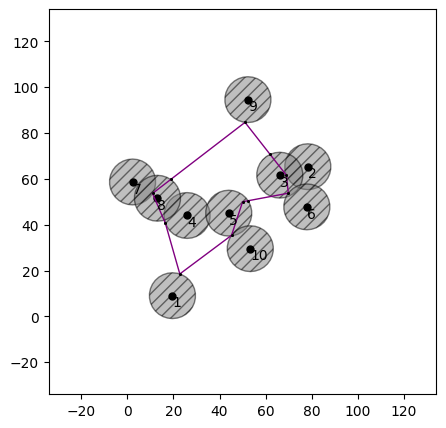

In [12]:
fig

In [13]:
cetsp = geoVeRoPy.solveCETSP(
    startLoc = (50, 50),
    endLoc = (50, 50),
    nodes = nodes,
    neighbor = "Circle",
    radius = 10,
    algo = "Exact",
    c2cAlgo = 'SOCP',
    method = "GBD",
    cutSetting = {'paretoCut': True})



[0, 3, 9, 2, 6, 10, 1, 8, 7, 4, 5, 11]
---------------------------------------------------------------------------
Num of iter:  12
206.19432573260806 206.19435625317524
Residual: 100.59584629620733
Add default cut: - theta >= 5.055 * e[0, 3] + 5.764 * e[3, 9] + 7.062 * e[9, 2] + 10.311 * e[2, 6] + 14.435 * e[6, 10] + 12.794 * e[10, 1] + 6.217 * e[1, 8] + 6.952 * e[8, 7] + 9.546 * e[7, 4] + 12.279 * e[4, 5] + 10.18 * e[5, 11]
Time Pass: 0.33[s]
Cut: subtour - 18, gbc - 1
So far Best Dist: inf
CurrSol Dist: 206.19432573260806
CurrObj: 105.59847943640074
CurrBound: 105.59847943640074


[0, 5, 4, 7, 8, 1, 10, 6, 2, 9, 3, 11]
---------------------------------------------------------------------------
Num of iter:  12
206.19432587138624 206.19435625317527
Residual: 100.5958464349855
Add default cut: - theta >= 10.18 * e[0, 5] + 12.279 * e[5, 4] + 9.546 * e[4, 7] + 6.952 * e[7, 8] + 6.217 * e[8, 1] + 12.794 * e[1, 10] + 14.435 * e[10, 6] + 10.311 * e[6, 2] + 7.062 * e[2, 9] + 5.764 * e[9, 

Num of iter:  13
201.3047664199406 202.64445254831762
Residual: 68.35417948694918
Add default cut: - theta >= 2.033 * e[0, 2] + 0.0 * e[2, 6] + 16.487 * e[6, 3] + 3.525 * e[3, 9] + 7.281 * e[9, 7] + 11.0 * e[7, 8] + 4.775 * e[8, 1] + 4.716 * e[1, 10] + 2.127 * e[10, 4] + 8.645 * e[4, 5] + 7.765 * e[5, 11]
Time Pass: 5.3[s]
Cut: subtour - 37, gbc - 16
So far Best Dist: 188.23015199758504
CurrSol Dist: 201.3047664199406
CurrObj: 184.30480898208114
CurrBound: 142.20450875607952


[0, 9, 7, 8, 1, 4, 5, 3, 2, 6, 10, 11]
---------------------------------------------------------------------------
Num of iter:  11
222.71849075835198 222.97732467378876
Residual: 79.0048656596201
Add default cut: - theta >= 0.841 * e[0, 9] + 5.568 * e[9, 7] + 12.643 * e[7, 8] + 2.172 * e[8, 1] + 5.643 * e[1, 4] + 17.893 * e[4, 5] + 10.034 * e[5, 3] + 8.652 * e[3, 2] + 4.844 * e[2, 6] + 9.67 * e[6, 10] + 1.045 * e[10, 11]
Time Pass: 5.64[s]
Cut: subtour - 37, gbc - 17
So far Best Dist: 188.23015199758504
CurrSol 

Num of iter:  21
191.5398199021731 192.01642331658712
Residual: 65.41944541005938
Add default cut: - theta >= 3.422 * e[0, 5] + 11.95 * e[5, 10] + 8.745 * e[10, 1] + 3.854 * e[1, 7] + 7.35 * e[7, 8] + 4.038 * e[8, 4] + 6.31 * e[4, 9] + 9.58 * e[9, 2] + 3.336 * e[2, 3] + 4.603 * e[3, 6] + 2.232 * e[6, 11]
Time Pass: 11.15[s]
Cut: subtour - 41, gbc - 30
So far Best Dist: 188.23015199758504
CurrSol Dist: 191.5398199021731
CurrObj: 174.02345061994936
CurrBound: 144.25711213863576


[0, 3, 6, 2, 9, 8, 7, 4, 1, 5, 10, 11]
---------------------------------------------------------------------------
Num of iter:  12
188.23017041862695 188.5654495089582
Residual: 63.43582961739912
Add default cut: - theta >= 3.6 * e[0, 3] + 6.706 * e[3, 6] + 7.852 * e[6, 2] + 10.185 * e[2, 9] + 6.539 * e[9, 8] + 4.025 * e[8, 7] + 7.319 * e[7, 4] + 7.976 * e[4, 1] + 4.396 * e[1, 5] + 0.163 * e[5, 10] + 4.675 * e[10, 11]
Time Pass: 11.36[s]
Cut: subtour - 41, gbc - 31
So far Best Dist: 188.23015199758504
CurrSol D



[0, 10, 1, 5, 4, 7, 8, 9, 3, 6, 2, 11]
---------------------------------------------------------------------------
Num of iter:  13
203.00922732886127 203.01298527534857
Residual: 65.38006578710281
Add default cut: - theta >= 5.059 * e[0, 10] + 7.066 * e[10, 1] + 3.016 * e[1, 5] + 11.518 * e[5, 4] + 8.156 * e[4, 7] + 2.097 * e[7, 8] + 6.289 * e[8, 9] + 7.825 * e[9, 3] + 12.32 * e[3, 6] + 0.003 * e[6, 2] + 2.03 * e[2, 11]
Time Pass: 16.49[s]
Cut: subtour - 43, gbc - 45
So far Best Dist: 188.23015199758504
CurrSol Dist: 203.00922732886127
CurrObj: 182.48115737446466
CurrBound: 146.17325437309285


[0, 6, 2, 3, 9, 4, 8, 7, 10, 1, 5, 11]
---------------------------------------------------------------------------
Num of iter:  10
213.79968147584992 214.05776278864147
Residual: 61.35380636533859
Add default cut: - theta >= 2.231 * e[0, 6] + 7.937 * e[6, 2] + 8.051 * e[2, 3] + 4.897 * e[3, 9] + 5.706 * e[9, 4] + 4.859 * e[4, 8] + 6.235 * e[8, 7] + 1.846 * e[7, 10] + 1.973 * e[10, 1] + 5.919

Num of iter:  12
212.5501153938274 212.58654045732442
Residual: 75.55655577758404
Add default cut: - theta >= 13.077 * e[0, 5] + 5.405 * e[5, 1] + 7.366 * e[1, 4] + 6.382 * e[4, 7] + 9.124 * e[7, 8] + 5.22 * e[8, 3] + 2.36 * e[3, 9] + 6.858 * e[9, 2] + 10.889 * e[2, 6] + 7.775 * e[6, 10] + 1.101 * e[10, 11]
Time Pass: 21.55[s]
Cut: subtour - 47, gbc - 59
So far Best Dist: 188.23015199758504
CurrSol Dist: 212.5501153938274
CurrObj: 185.39624782253304
CurrBound: 149.91384261898955


[0, 5, 3, 6, 2, 9, 8, 7, 1, 4, 10, 11]
---------------------------------------------------------------------------
Num of iter:  12
192.3153457191549 192.52892536569962
Residual: 57.51155683558588
Add default cut: - theta >= 2.089 * e[0, 5] + 3.883 * e[5, 3] + 6.55 * e[3, 6] + 7.852 * e[6, 2] + 10.177 * e[2, 9] + 6.166 * e[9, 8] + 4.622 * e[8, 7] + 5.039 * e[7, 1] + 3.941 * e[1, 4] + 4.63 * e[4, 10] + 2.563 * e[10, 11]
Time Pass: 21.77[s]
Cut: subtour - 47, gbc - 60
So far Best Dist: 188.23015199758504
CurrSo

Num of iter:  16
194.16132466094632 194.16625023558268
Residual: 68.94895883993355
Add default cut: - theta >= 2.033 * e[0, 2] + 0.0 * e[2, 6] + 14.8 * e[6, 3] + 4.679 * e[3, 9] + 6.337 * e[9, 4] + 3.599 * e[4, 7] + 9.273 * e[7, 8] + 4.109 * e[8, 1] + 8.747 * e[1, 10] + 7.93 * e[10, 5] + 7.442 * e[5, 11]
Time Pass: 26.55[s]
Cut: subtour - 53, gbc - 73
So far Best Dist: 188.23015199758504
CurrSol Dist: 194.16132466094632
CurrObj: 179.128625514431
CurrBound: 151.9373706393518


[0, 5, 3, 2, 6, 9, 4, 7, 8, 1, 10, 11]
---------------------------------------------------------------------------
Num of iter:  12
194.16133030559163 194.1614627852496
Residual: 55.149911865174275
Add default cut: - theta >= 1.987 * e[0, 5] + 4.056 * e[5, 3] + 10.485 * e[3, 2] + 0.0 * e[2, 6] + 1.914 * e[6, 9] + 6.339 * e[9, 4] + 3.594 * e[4, 7] + 11.746 * e[7, 8] + 1.639 * e[8, 1] + 8.749 * e[1, 10] + 4.642 * e[10, 11]
Time Pass: 26.84[s]
Cut: subtour - 53, gbc - 74
So far Best Dist: 188.23015199758504
CurrSol D

Num of iter:  18
198.67716705599963 200.44214448295568
Residual: 60.37835349837917
Add default cut: - theta >= 2.238 * e[0, 6] + 4.442 * e[6, 3] + 3.411 * e[3, 2] + 10.182 * e[2, 9] + 6.485 * e[9, 8] + 4.122 * e[8, 7] + 6.245 * e[7, 1] + 4.716 * e[1, 10] + 2.128 * e[10, 4] + 8.307 * e[4, 5] + 8.103 * e[5, 11]
Time Pass: 30.49[s]
Cut: subtour - 55, gbc - 88
So far Best Dist: 188.23015199758504
CurrSol Dist: 198.67716705599963
CurrObj: 179.6504854038367
CurrBound: 153.45475501079588


[0, 6, 3, 2, 9, 8, 7, 4, 5, 1, 10, 11]
---------------------------------------------------------------------------
Num of iter:  18
200.3806582920768 200.80993970165105
Residual: 63.579440339626814
Add default cut: - theta >= 2.239 * e[0, 6] + 4.55 * e[6, 3] + 3.285 * e[3, 2] + 10.334 * e[2, 9] + 6.5 * e[9, 8] + 1.856 * e[8, 7] + 8.431 * e[7, 4] + 11.243 * e[4, 5] + 3.017 * e[5, 1] + 7.068 * e[1, 10] + 5.057 * e[10, 11]
Time Pass: 30.97[s]
Cut: subtour - 55, gbc - 89
So far Best Dist: 188.23015199758504
Cur

Num of iter:  11
208.628346065074 208.6283820403122
Residual: 72.65498074226267
Add default cut: - theta >= 0.466 * e[0, 9] + 2.115 * e[9, 3] + 8.682 * e[3, 2] + 10.099 * e[2, 6] + 13.083 * e[6, 10] + 7.586 * e[10, 5] + 10.732 * e[5, 4] + 4.272 * e[4, 1] + 2.666 * e[1, 7] + 6.513 * e[7, 8] + 6.442 * e[8, 11]
Time Pass: 35.32[s]
Cut: subtour - 55, gbc - 103
So far Best Dist: 188.23015199758504
CurrSol Dist: 208.628346065074
CurrObj: 183.5315234347541
CurrBound: 154.60603331509841


[0, 1, 7, 8, 4, 10, 6, 2, 9, 3, 5, 11]
---------------------------------------------------------------------------
Num of iter:  12
215.54170156740167 215.70279205373114
Residual: 77.90517659176263
Add default cut: - theta >= 1.182 * e[0, 1] + 2.514 * e[1, 7] + 8.878 * e[7, 8] + 15.604 * e[8, 4] + 8.333 * e[4, 10] + 10.952 * e[10, 6] + 10.353 * e[6, 2] + 7.054 * e[2, 9] + 5.765 * e[9, 3] + 5.671 * e[3, 5] + 1.6 * e[5, 11]
Time Pass: 35.52[s]
Cut: subtour - 55, gbc - 104
So far Best Dist: 188.23015199758504
Cu



[0, 10, 1, 4, 7, 8, 9, 3, 2, 6, 5, 11]
---------------------------------------------------------------------------
Num of iter:  12
188.2301810752807 188.5654494675147
Residual: 66.72149144083292
Add default cut: - theta >= 4.674 * e[0, 10] + 8.563 * e[10, 1] + 7.977 * e[1, 4] + 7.317 * e[4, 7] + 2.532 * e[7, 8] + 8.032 * e[8, 9] + 7.881 * e[9, 3] + 5.685 * e[3, 2] + 7.853 * e[2, 6] + 5.233 * e[6, 5] + 0.973 * e[5, 11]
Time Pass: 40.03[s]
Cut: subtour - 55, gbc - 117
So far Best Dist: 188.23015199758504
CurrSol Dist: 188.2301810752807
CurrObj: 168.06760341169397
CurrBound: 157.69450899778766


[0, 10, 1, 4, 7, 8, 9, 3, 6, 2, 5, 11]
---------------------------------------------------------------------------
Num of iter:  13
190.85785627121194 191.19261463806967
Residual: 63.49349065971553
Add default cut: - theta >= 4.674 * e[0, 10] + 8.563 * e[10, 1] + 7.976 * e[1, 4] + 7.317 * e[4, 7] + 3.0 * e[7, 8] + 7.596 * e[8, 9] + 6.257 * e[9, 3] + 13.757 * e[3, 6] + 0.0 * e[6, 2] + 3.085 * e[

Num of iter:  11
198.86910054104308 199.0866869457351
Residual: 72.14095458059452
Add default cut: - theta >= 9.876 * e[0, 5] + 11.206 * e[5, 4] + 6.352 * e[4, 1] + 5.11 * e[1, 7] + 4.926 * e[7, 8] + 5.864 * e[8, 9] + 9.636 * e[9, 2] + 3.366 * e[2, 3] + 6.868 * e[3, 6] + 7.837 * e[6, 10] + 1.1 * e[10, 11]
Time Pass: 44.0[s]
Cut: subtour - 55, gbc - 131
So far Best Dist: 188.23015199758504
CurrSol Dist: 198.86910054104308
CurrObj: 176.5476502517035
CurrBound: 158.6652907278801


[0, 3, 9, 2, 6, 5, 4, 1, 7, 8, 10, 11]
---------------------------------------------------------------------------
Num of iter:  11
221.2677368050136 221.29008872549267
Residual: 77.87482743856273
Add default cut: - theta >= 5.054 * e[0, 3] + 5.764 * e[3, 9] + 7.248 * e[9, 2] + 9.41 * e[2, 6] + 6.862 * e[6, 5] + 19.614 * e[5, 4] + 5.373 * e[4, 1] + 2.04 * e[1, 7] + 12.575 * e[7, 8] + 2.631 * e[8, 10] + 1.304 * e[10, 11]
Time Pass: 44.17[s]
Cut: subtour - 55, gbc - 132
So far Best Dist: 188.23015199758504
CurrSol

Num of iter:  13
219.7889396563003 219.84341171161844
Residual: 70.9375115599251
Add default cut: - theta >= 1.101 * e[0, 10] + 7.824 * e[10, 6] + 5.821 * e[6, 3] + 4.541 * e[3, 2] + 8.781 * e[2, 9] + 9.147 * e[9, 8] + 5.851 * e[8, 1] + 6.729 * e[1, 4] + 5.454 * e[4, 7] + 5.321 * e[7, 5] + 10.368 * e[5, 11]
Time Pass: 49.82[s]
Cut: subtour - 55, gbc - 146
So far Best Dist: 188.23015199758504
CurrSol Dist: 219.7889396563003
CurrObj: 187.79114044674438
CurrBound: 160.12354720741956


[0, 10, 1, 4, 7, 8, 5, 9, 3, 2, 6, 11]
---------------------------------------------------------------------------
Num of iter:  12
198.60840605056177 198.60840866355784
Residual: 69.53844423175622
Add default cut: - theta >= 4.675 * e[0, 10] + 8.56 * e[10, 1] + 7.364 * e[1, 4] + 6.177 * e[4, 7] + 10.117 * e[7, 8] + 6.168 * e[8, 5] + 4.154 * e[5, 9] + 6.27 * e[9, 3] + 5.71 * e[3, 2] + 8.124 * e[2, 6] + 2.219 * e[6, 11]
Time Pass: 50.03[s]
Cut: subtour - 55, gbc - 147
So far Best Dist: 188.23015199758504
Curr

Num of iter:  11
209.65283800975027 209.65311217477893
Residual: 85.4797778000048
Add default cut: - theta >= 0.459 * e[0, 9] + 8.069 * e[9, 2] + 7.701 * e[2, 6] + 8.155 * e[6, 3] + 9.925 * e[3, 5] + 16.898 * e[5, 4] + 9.782 * e[4, 8] + 7.252 * e[8, 7] + 3.85 * e[7, 1] + 8.742 * e[1, 10] + 4.648 * e[10, 11]
Time Pass: 53.93[s]
Cut: subtour - 57, gbc - 161
So far Best Dist: 188.23015199758504
CurrSol Dist: 209.65283800975027
CurrObj: 184.88624467196524
CurrBound: 160.64257661629992


[0, 5, 4, 8, 7, 1, 10, 6, 2, 3, 9, 11]
---------------------------------------------------------------------------
Num of iter:  12
205.08109692468616 205.08122631390592
Residual: 92.1102671151939
Add default cut: - theta >= 9.36 * e[0, 5] + 12.812 * e[5, 4] + 10.279 * e[4, 8] + 7.355 * e[8, 7] + 3.632 * e[7, 1] + 11.608 * e[1, 10] + 15.644 * e[10, 6] + 10.174 * e[6, 2] + 8.12 * e[2, 3] + 2.662 * e[3, 9] + 0.465 * e[9, 11]
Time Pass: 54.12[s]
Cut: subtour - 57, gbc - 162
So far Best Dist: 188.23015199758504

Num of iter:  11
192.31532510105106 193.09882443795098
Residual: 66.02338869465277
Add default cut: - theta >= 5.385 * e[0, 3] + 4.922 * e[3, 6] + 7.856 * e[6, 2] + 10.172 * e[2, 9] + 8.477 * e[9, 8] + 2.308 * e[8, 7] + 5.042 * e[7, 1] + 3.941 * e[1, 4] + 4.63 * e[4, 10] + 6.727 * e[10, 5] + 6.564 * e[5, 11]
Time Pass: 57.2[s]
Cut: subtour - 61, gbc - 175
So far Best Dist: 188.23015199758504
CurrSol Dist: 192.31532510105106
CurrObj: 175.26809664738641
CurrBound: 162.56038470208833


[0, 10, 5, 1, 4, 7, 8, 9, 2, 3, 6, 11]
---------------------------------------------------------------------------
Num of iter:  18
188.23016372355391 188.9903065787488
Residual: 55.36755222249139
Add default cut: - theta >= 4.674 * e[0, 10] + 0.213 * e[10, 5] + 4.346 * e[5, 1] + 7.978 * e[1, 4] + 7.318 * e[4, 7] + 6.671 * e[7, 8] + 3.894 * e[8, 9] + 10.183 * e[9, 2] + 3.809 * e[2, 3] + 4.044 * e[3, 6] + 2.238 * e[6, 11]
Time Pass: 57.77[s]
Cut: subtour - 61, gbc - 176
So far Best Dist: 188.23015199758504
C

Num of iter:  11
198.86910531859243 199.35332334736694
Residual: 71.4515840085387
Add default cut: - theta >= 6.283 * e[0, 4] + 6.35 * e[4, 1] + 5.112 * e[1, 7] + 7.229 * e[7, 8] + 3.561 * e[8, 9] + 4.161 * e[9, 3] + 8.857 * e[3, 2] + 10.234 * e[2, 6] + 7.838 * e[6, 10] + 5.538 * e[10, 5] + 6.289 * e[5, 11]
Time Pass: 61.15[s]
Cut: subtour - 61, gbc - 189
So far Best Dist: 188.23015199758504
CurrSol Dist: 198.86910531859243
CurrObj: 185.29365703619652
CurrBound: 164.55271225808045


[0, 10, 1, 8, 7, 4, 5, 6, 2, 9, 3, 11]
---------------------------------------------------------------------------
Num of iter:  11
210.77048676453586 210.77048835688498
Residual: 91.03536208538392
Add default cut: - theta >= 4.643 * e[0, 10] + 8.748 * e[10, 1] + 5.718 * e[1, 8] + 7.669 * e[8, 7] + 7.346 * e[7, 4] + 18.864 * e[4, 5] + 11.679 * e[5, 6] + 7.816 * e[6, 2] + 7.738 * e[2, 9] + 5.764 * e[9, 3] + 5.051 * e[3, 11]
Time Pass: 61.39[s]
Cut: subtour - 61, gbc - 190
So far Best Dist: 188.23015199758504

Num of iter:  16
203.08692321521644 203.09172284030606
Residual: 76.10722127540552
Add default cut: - theta >= 7.251 * e[0, 5] + 8.121 * e[5, 10] + 8.738 * e[10, 1] + 2.96 * e[1, 8] + 10.528 * e[8, 7] + 5.461 * e[7, 4] + 12.273 * e[4, 3] + 2.675 * e[3, 9] + 7.411 * e[9, 2] + 8.493 * e[2, 6] + 2.197 * e[6, 11]
Time Pass: 66.77[s]
Cut: subtour - 61, gbc - 203
So far Best Dist: 188.23015199758504
CurrSol Dist: 203.08692321521644
CurrObj: 185.62600213631305
CurrBound: 164.74079724128728


[0, 10, 1, 4, 7, 8, 9, 6, 2, 3, 5, 11]
---------------------------------------------------------------------------
Num of iter:  13
190.8578077379901 191.19261463304267
Residual: 58.100118514663244
Add default cut: - theta >= 4.675 * e[0, 10] + 8.562 * e[10, 1] + 7.976 * e[1, 4] + 7.315 * e[4, 7] + 5.679 * e[7, 8] + 4.917 * e[8, 9] + 2.447 * e[9, 6] + 0.0 * e[6, 2] + 11.886 * e[2, 3] + 2.85 * e[3, 5] + 1.792 * e[5, 11]
Time Pass: 67.07[s]
Cut: subtour - 61, gbc - 204
So far Best Dist: 188.23015199758504
C

Num of iter:  18
190.8578228433224 191.196509828875
Residual: 66.61198609716627
Add default cut: - theta >= 8.03 * e[0, 5] + 7.371 * e[5, 10] + 8.564 * e[10, 1] + 7.975 * e[1, 4] + 7.317 * e[4, 7] + 5.296 * e[7, 8] + 5.298 * e[8, 9] + 2.448 * e[9, 6] + 0.0 * e[6, 2] + 11.457 * e[2, 3] + 2.854 * e[3, 11]
Time Pass: 71.56[s]
Cut: subtour - 61, gbc - 217
So far Best Dist: 188.23015199758504
CurrSol Dist: 190.8578228433224
CurrObj: 177.31188496555296
CurrBound: 167.10597285214325


[0, 9, 2, 3, 6, 10, 5, 4, 7, 8, 1, 11]
---------------------------------------------------------------------------
Num of iter:  13
214.42862940359225 214.43270682160136
Residual: 78.27692357571847
Add default cut: - theta >= 0.466 * e[0, 9] + 7.391 * e[9, 2] + 4.561 * e[2, 3] + 5.668 * e[3, 6] + 10.96 * e[6, 10] + 15.914 * e[10, 5] + 8.164 * e[5, 4] + 11.924 * e[4, 7] + 10.369 * e[7, 8] + 1.679 * e[8, 1] + 1.181 * e[1, 11]
Time Pass: 71.8[s]
Cut: subtour - 61, gbc - 218
So far Best Dist: 188.23015199758504
Curr



[0, 4, 5, 10, 1, 8, 7, 9, 3, 2, 6, 11]
---------------------------------------------------------------------------
Num of iter:  12
198.67713660485725 199.4313640645949
Residual: 66.12089213554307
Add default cut: - theta >= 1.61 * e[0, 4] + 3.656 * e[4, 5] + 9.455 * e[5, 10] + 4.717 * e[10, 1] + 7.584 * e[1, 8] + 8.193 * e[8, 7] + 7.251 * e[7, 9] + 7.126 * e[9, 3] + 6.44 * e[3, 2] + 7.851 * e[2, 6] + 2.239 * e[6, 11]
Time Pass: 75.9[s]
Cut: subtour - 61, gbc - 232
So far Best Dist: 188.23015199758504
CurrSol Dist: 198.67713660485725
CurrObj: 186.90633556414775
CurrBound: 167.27759557688015


[0, 9, 3, 2, 6, 5, 8, 7, 1, 4, 10, 11]
---------------------------------------------------------------------------
Num of iter:  9
213.66453986220023 213.6646617955238
Residual: 67.93349118369662
Add default cut: - theta >= 0.458 * e[0, 9] + 1.715 * e[9, 3] + 9.741 * e[3, 2] + 7.702 * e[2, 6] + 10.031 * e[6, 5] + 12.858 * e[5, 8] + 11.321 * e[8, 7] + 2.894 * e[7, 1] + 3.987 * e[1, 4] + 4.661 * e

Num of iter:  13
190.85783338233506 191.19261464848634
Residual: 56.3202961032583
Add default cut: - theta >= 4.675 * e[0, 10] + 0.164 * e[10, 5] + 4.395 * e[5, 1] + 7.975 * e[1, 4] + 7.843 * e[4, 8] + 7.27 * e[8, 7] + 7.236 * e[7, 9] + 2.449 * e[9, 6] + 0.0 * e[6, 2] + 9.119 * e[2, 3] + 5.191 * e[3, 11]
Time Pass: 78.64[s]
Cut: subtour - 61, gbc - 246
So far Best Dist: 188.2301331498521
CurrSol Dist: 190.85783338233506
CurrObj: 182.67814531268175
CurrBound: 169.32734361524848


[0, 6, 2, 3, 9, 8, 7, 4, 1, 5, 10, 11]
---------------------------------------------------------------------------
Num of iter:  12
188.2301692262289 188.56544949792098
Residual: 58.749919426273095
Add default cut: - theta >= 2.243 * e[0, 6] + 7.844 * e[6, 2] + 6.736 * e[2, 3] + 6.835 * e[3, 9] + 4.839 * e[9, 8] + 5.725 * e[8, 7] + 7.321 * e[7, 4] + 7.974 * e[4, 1] + 4.409 * e[1, 5] + 0.15 * e[5, 10] + 4.675 * e[10, 11]
Time Pass: 78.85[s]
Cut: subtour - 61, gbc - 247
So far Best Dist: 188.2301331498521
CurrSol

Num of iter:  21
188.23143357343716 189.00799968746455
Residual: 59.294980901271344
Add default cut: - theta >= 2.239 * e[0, 6] + 4.638 * e[6, 3] + 3.216 * e[3, 2] + 10.183 * e[2, 9] + 7.195 * e[9, 7] + 6.433 * e[7, 4] + 0.001 * e[4, 8] + 1.428 * e[8, 1] + 8.56 * e[1, 10] + 8.079 * e[10, 5] + 7.325 * e[5, 11]
Time Pass: 83.52[s]
Cut: subtour - 61, gbc - 260
So far Best Dist: 188.2301331498521
CurrSol Dist: 188.23143357343716
CurrObj: 180.49934397580432
CurrBound: 169.9221880945757


[0, 3, 6, 2, 9, 4, 8, 7, 1, 10, 5, 11]
---------------------------------------------------------------------------
Num of iter:  21
191.53983376974315 191.5944629484829
Residual: 73.48772997746411
Add default cut: - theta >= 6.642 * e[0, 3] + 3.658 * e[3, 6] + 7.939 * e[6, 2] + 9.582 * e[2, 9] + 6.308 * e[9, 4] + 6.131 * e[4, 8] + 5.259 * e[8, 7] + 3.851 * e[7, 1] + 8.747 * e[1, 10] + 8.052 * e[10, 5] + 7.319 * e[5, 11]
Time Pass: 84.14[s]
Cut: subtour - 61, gbc - 261
So far Best Dist: 188.2301331498521
Cur

Num of iter:  11
198.86913143208002 199.08668695267514
Residual: 78.31715568556896
Add default cut: - theta >= 1.099 * e[0, 10] + 7.841 * e[10, 6] + 6.794 * e[6, 3] + 3.439 * e[3, 2] + 9.634 * e[2, 9] + 7.433 * e[9, 7] + 11.901 * e[7, 8] + 2.743 * e[8, 1] + 6.352 * e[1, 4] + 11.132 * e[4, 5] + 9.949 * e[5, 11]
Time Pass: 87.46[s]
Cut: subtour - 61, gbc - 274
So far Best Dist: 188.2301331498521
CurrSol Dist: 198.86913143208002
CurrObj: 179.00092115506942
CurrBound: 171.83550482293262


[0, 5, 1, 4, 7, 8, 10, 6, 2, 3, 9, 11]
---------------------------------------------------------------------------
Num of iter:  11
214.7842374339889 214.97514804122434
Residual: 81.13339657880361
Add default cut: - theta >= 13.761 * e[0, 5] + 4.716 * e[5, 1] + 6.733 * e[1, 4] + 5.846 * e[4, 7] + 10.657 * e[7, 8] + 7.047 * e[8, 10] + 10.899 * e[10, 6] + 10.235 * e[6, 2] + 8.917 * e[2, 3] + 1.857 * e[3, 9] + 0.465 * e[9, 11]
Time Pass: 87.7[s]
Cut: subtour - 61, gbc - 275
So far Best Dist: 188.230133149852

Num of iter:  11
205.08124648570407 205.08519088858415
Residual: 76.83644922524668
Add default cut: - theta >= 8.71 * e[0, 4] + 10.622 * e[4, 8] + 5.672 * e[8, 7] + 3.632 * e[7, 1] + 11.44 * e[1, 10] + 5.954 * e[10, 5] + 12.351 * e[5, 3] + 0.407 * e[3, 6] + 10.181 * e[6, 2] + 7.399 * e[2, 9] + 0.468 * e[9, 11]
Time Pass: 92.34[s]
Cut: subtour - 61, gbc - 288
So far Best Dist: 188.2301331498521
CurrSol Dist: 205.08124648570407
CurrObj: 187.53357797187576
CurrBound: 172.5483607330227


[0, 10, 5, 1, 4, 7, 8, 9, 2, 6, 3, 11]
---------------------------------------------------------------------------
Num of iter:  12
188.23017001947466 188.5654495089582
Residual: 63.43582921824682
Add default cut: - theta >= 4.675 * e[0, 10] + 0.163 * e[10, 5] + 4.396 * e[5, 1] + 7.976 * e[1, 4] + 7.319 * e[4, 7] + 4.025 * e[7, 8] + 6.539 * e[8, 9] + 10.185 * e[9, 2] + 7.852 * e[2, 6] + 6.706 * e[6, 3] + 3.6 * e[3, 11]
Time Pass: 92.56[s]
Cut: subtour - 61, gbc - 289
So far Best Dist: 188.2301331498521
Cur



[0, 4, 7, 8, 1, 10, 6, 2, 3, 9, 5, 11]
---------------------------------------------------------------------------
Num of iter:  12
205.08124275167404 205.0812262967596
Residual: 83.44584259901745
Add default cut: - theta >= 4.838 * e[0, 4] + 12.367 * e[4, 7] + 8.923 * e[7, 8] + 4.248 * e[8, 1] + 11.867 * e[1, 10] + 15.375 * e[10, 6] + 10.182 * e[6, 2] + 8.931 * e[2, 3] + 1.848 * e[3, 9] + 3.152 * e[9, 5] + 1.714 * e[5, 11]
Time Pass: 96.81[s]
Cut: subtour - 61, gbc - 303
So far Best Dist: 188.2301331498521
CurrSol Dist: 205.08124275167404
CurrObj: 184.28184284672435
CurrBound: 173.86518596311905


[0, 3, 6, 2, 9, 5, 10, 1, 7, 8, 4, 11]
---------------------------------------------------------------------------
Num of iter:  11
209.9137330572857 209.91373083752185
Residual: 83.85200272113718
Add default cut: - theta >= 3.937 * e[0, 3] + 6.34 * e[3, 6] + 8.284 * e[6, 2] + 7.976 * e[2, 9] + 3.523 * e[9, 5] + 16.99 * e[5, 10] + 8.169 * e[10, 1] + 3.63 * e[1, 7] + 9.344 * e[7, 8] + 12.52



[0, 10, 3, 6, 2, 9, 7, 8, 1, 4, 5, 11]
---------------------------------------------------------------------------
Num of iter:  14
198.87007518496716 199.08765832010369
Residual: 74.35300164154992
Add default cut: - theta >= 1.093 * e[0, 10] + 4.006 * e[10, 3] + 0.0 * e[3, 6] + 10.088 * e[6, 2] + 9.656 * e[2, 9] + 7.432 * e[9, 7] + 6.398 * e[7, 8] + 8.247 * e[8, 1] + 6.35 * e[1, 4] + 11.249 * e[4, 5] + 9.834 * e[5, 11]
Time Pass: 101.2[s]
Cut: subtour - 61, gbc - 318
So far Best Dist: 188.2301331498521
CurrSol Dist: 198.87007518496716
CurrObj: 185.36026742131784
CurrBound: 175.44550408586065


[0, 3, 6, 2, 9, 7, 8, 1, 10, 4, 5, 11]
---------------------------------------------------------------------------
Num of iter:  12
198.6771648070485 200.01728743833564
Residual: 74.62279216320026
Add default cut: - theta >= 3.084 * e[0, 3] + 7.224 * e[3, 6] + 7.853 * e[6, 2] + 10.182 * e[2, 9] + 7.25 * e[9, 7] + 13.198 * e[7, 8] + 2.581 * e[8, 1] + 4.716 * e[1, 10] + 2.126 * e[10, 4] + 8.329 

Num of iter:  13
190.85785644243947 191.19261463806967
Residual: 63.493490830943045
Add default cut: - theta >= 1.27 * e[0, 5] + 3.085 * e[5, 2] + 0.0 * e[2, 6] + 13.757 * e[6, 3] + 6.257 * e[3, 9] + 7.596 * e[9, 8] + 3.0 * e[8, 7] + 7.317 * e[7, 4] + 7.976 * e[4, 1] + 8.563 * e[1, 10] + 4.674 * e[10, 11]
Time Pass: 105.92[s]
Cut: subtour - 61, gbc - 332
So far Best Dist: 188.2301331498521
CurrSol Dist: 190.85785644243947
CurrObj: 182.9774876291432
CurrBound: 177.28565650955235


[0, 5, 6, 2, 3, 9, 8, 7, 4, 1, 10, 11]
---------------------------------------------------------------------------
Num of iter:  12
188.2301810593911 188.56544946751467
Residual: 66.72149142494331
Add default cut: - theta >= 0.973 * e[0, 5] + 5.233 * e[5, 6] + 7.853 * e[6, 2] + 5.685 * e[2, 3] + 7.881 * e[3, 9] + 8.032 * e[9, 8] + 2.532 * e[8, 7] + 7.317 * e[7, 4] + 7.977 * e[4, 1] + 8.563 * e[1, 10] + 4.674 * e[10, 11]
Time Pass: 106.2[s]
Cut: subtour - 61, gbc - 333
So far Best Dist: 188.2301331498521
CurrSo

Num of iter:  13
190.8578266914946 191.19261465260703
Residual: 62.540355421695864
Add default cut: - theta >= 1.513 * e[0, 5] + 4.327 * e[5, 3] + 10.688 * e[3, 2] + 0.0 * e[2, 6] + 2.448 * e[6, 9] + 7.239 * e[9, 7] + 7.758 * e[7, 8] + 7.354 * e[8, 4] + 7.977 * e[4, 1] + 8.561 * e[1, 10] + 4.676 * e[10, 11]
Time Pass: 109.84[s]
Cut: subtour - 61, gbc - 346
So far Best Dist: 188.2301331498521
CurrSol Dist: 190.8578266914946
CurrObj: 180.56922605465033
CurrBound: 177.34088450369742


[0, 10, 6, 3, 2, 9, 7, 8, 4, 1, 5, 11]
---------------------------------------------------------------------------
Num of iter:  13
198.23303303850622 198.56871577521002
Residual: 77.18692641278227
Add default cut: - theta >= 1.099 * e[0, 10] + 7.84 * e[10, 6] + 5.785 * e[6, 3] + 4.447 * e[3, 2] + 9.646 * e[2, 9] + 7.222 * e[9, 7] + 6.756 * e[7, 8] + 8.207 * e[8, 4] + 7.7 * e[4, 1] + 3.488 * e[1, 5] + 14.997 * e[5, 11]
Time Pass: 110.1[s]
Cut: subtour - 61, gbc - 347
So far Best Dist: 188.2301331498521
CurrS

Num of iter:  18
192.3153427999365 193.52336735959955
Residual: 57.95513569370351
Add default cut: - theta >= 2.237 * e[0, 6] + 5.05 * e[6, 3] + 2.801 * e[3, 2] + 10.178 * e[2, 9] + 8.331 * e[9, 8] + 2.453 * e[8, 7] + 5.042 * e[7, 1] + 3.94 * e[1, 4] + 4.63 * e[4, 10] + 7.139 * e[10, 5] + 6.152 * e[5, 11]
Time Pass: 115.07[s]
Cut: subtour - 61, gbc - 360
So far Best Dist: 188.23013305496193
CurrSol Dist: 192.3153427999365
CurrObj: 186.35921858744547
CurrBound: 178.966398328382


[0, 5, 8, 7, 1, 4, 10, 6, 3, 9, 2, 11]
---------------------------------------------------------------------------
Num of iter:  12
219.24066123485056 219.2406592811048
Residual: 81.00407992153035
Add default cut: - theta >= 7.61 * e[0, 5] + 14.206 * e[5, 8] + 6.501 * e[8, 7] + 2.666 * e[7, 1] + 4.278 * e[1, 4] + 7.476 * e[4, 10] + 11.782 * e[10, 6] + 14.84 * e[6, 3] + 5.877 * e[3, 9] + 3.107 * e[9, 2] + 2.66 * e[2, 11]
Time Pass: 115.28[s]
Cut: subtour - 61, gbc - 361
So far Best Dist: 188.23013305496193
CurrS

Num of iter:  11
198.67717069667873 200.01728771903385
Residual: 68.44662783889297
Add default cut: - theta >= 6.612 * e[0, 3] + 3.695 * e[3, 6] + 7.854 * e[6, 2] + 10.18 * e[2, 9] + 8.427 * e[9, 8] + 2.18 * e[8, 7] + 6.245 * e[7, 1] + 4.717 * e[1, 10] + 2.127 * e[10, 4] + 8.081 * e[4, 5] + 8.329 * e[5, 11]
Time Pass: 119.37[s]
Cut: subtour - 61, gbc - 375
So far Best Dist: 188.23013305496193
CurrSol Dist: 198.67717069667873
CurrObj: 186.95683268786541
CurrBound: 181.6237056713702


[0, 10, 1, 8, 7, 4, 9, 3, 2, 6, 5, 11]
---------------------------------------------------------------------------
Num of iter:  12
191.53982338248198 191.5398341500115
Residual: 63.77740453094368
Add default cut: - theta >= 4.643 * e[0, 10] + 8.747 * e[10, 1] + 7.356 * e[1, 8] + 6.029 * e[8, 7] + 3.592 * e[7, 4] + 6.308 * e[4, 9] + 7.044 * e[9, 3] + 5.919 * e[3, 2] + 7.94 * e[2, 6] + 5.879 * e[6, 5] + 0.32 * e[5, 11]
Time Pass: 119.57[s]
Cut: subtour - 63, gbc - 376
So far Best Dist: 188.23013305496193
Cur

In [14]:
cetsp['ofv'], cetsp['dist'], cetsp['runtime']

(188.23012307058264, 188.2301331498521, 123.86996650695801)

In [15]:
cetsp['seq']

[0, 5, 6, 3, 2, 9, 7, 8, 4, 1, 10, 11]

In [16]:
fig, ax = geoVeRoPy.plotLocSeq(
    fig = fig,
    ax = ax,
    lineColor = 'red',
    locSeq = cetsp['path'])

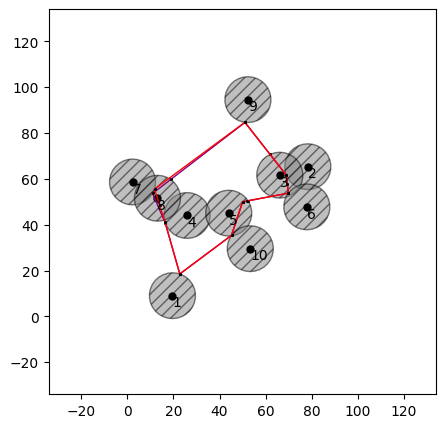

In [17]:
fig

In [12]:
circles = {}
for i in nodes:
    circles[i] = {
        'center': nodes[i]['loc'],
        'radius': 10
    }

In [18]:
segSet = geoVeRoPy.segSetSeq2Circle(seq = cetsp['path'], circles = circles)

{0: {'loc': (50, 50), 'tangCircle': [], 'inerCircle': []}, 1: {'loc': (53.73732116279497, 64.14581053947437), 'tangCircle': [9], 'inerCircle': [9, 15]}, 2: {'loc': (13.224636998773011, 87.00374565984806), 'tangCircle': [6], 'inerCircle': [6, 14]}, 3: {'loc': (15.442571321733942, 34.76448024693015), 'tangCircle': [17], 'inerCircle': [12, 17]}, 4: {'loc': (17.222439349597177, 33.78832373370212), 'tangCircle': [17], 'inerCircle': [1, 12, 19, 17]}, 5: {'loc': (36.114142366919594, 25.202981759054158), 'tangCircle': [7], 'inerCircle': [7]}, 6: {'loc': (42.99560922111022, 14.309764269344326), 'tangCircle': [20], 'inerCircle': [18, 20]}, 7: {'loc': (69.23359714150594, 11.293931979310102), 'tangCircle': [5], 'inerCircle': [5]}, 8: {'loc': (73.90929169438373, 16.584668369907913), 'tangCircle': [2], 'inerCircle': [2]}, 9: {'loc': (58.342734907123756, 44.21936038790113), 'tangCircle': [16], 'inerCircle': [8, 16]}, 10: {'loc': (50, 50), 'tangCircle': [], 'inerCircle': []}}


D:\Zoo\Gull\geoVeRoPy\demo\../../geoVeRoPy\geoVeRoPy\polyTour.py:392: UserWarning: WARNING: Did not find the corresponding circle, the smallest error is 1.1385181727532903
  warnings.warn(f"WARNING: Did not find the corresponding circle, the smallest error is {closestToBoundaryError}")


In [6]:
for i in range(len(segSet)):
    if (segSet[i]['type'] == 'Segment'):
        segSet[i]['length'] = geoVeRoPy.distEuclideanXY(segSet[i]['shape'][0], segSet[i]['shape'][1])
    else:
        segSet[i]['length'] = 0
# 每个polygon内的seg的集合
for p in circles:
    circles[p]['segSet'] = []
for i in range(len(segSet)):
    for p in segSet[i]['belong']:
        circles[p]['segSet'].append(i)
for p in circles:
    print(p, circles[p]['segSet'])

1 [32, 33]
2 [13, 14]
3 [23, 24, 25, 27, 44, 45, 54, 55, 56]
4 [47, 50]
5 [24, 25, 26, 27, 28, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
6 [0, 1, 2, 30, 35, 58]
7 [4, 5, 6, 7, 8, 9, 10, 11]
8 [17, 20, 37, 38, 39, 40, 41, 42]
9 [5, 6, 6, 7, 7, 8, 9]
10 [16, 17, 18, 19, 20, 21, 38, 41]


In [2]:
seq = [(0, 0), (129.0, -130.0), (129.0, -130.0), (494.27350242630354, -412.6434516324892), (494.27350242630354, -412.6434516324892), (497.70607753949093, -406.88595339607957), (358.6911869633958, -152.62202932155603), (131.70607753949093, 282.88595339607957), (131.70607753949093, 282.88595339607957), (-208.68820903059628, 667.8097749290082), (-208.91722461250518, 667.6025291846704), (-431.0, 166.0), (-430.67135449164346, 166.00027001985768), (-165.05693545089244, -379.6119328535582), (-165.05693545089244, -379.6119328535582), (-244.6455725213949, 656.2069156560019), (-244.87865683272906, 656.3979093274526), (-522.6549629589149, 62.12180331609562), (-520.6539051089277, 61.835301992956204), (-426.2240934977426, 149.46331352698206), (-420.01686527465927, 166.62456526068758), (0, 0)]
circles = {1: {'center': (-107, -571), 'radius': 200, 'demandST': 500, 'serviceTime': 0, 'segSet': [14]}, 2: {'center': (298, 394), 'radius': 200, 'demandST': 500, 'serviceTime': 0, 'segSet': [10]}, 3: {'center': (-431, 366), 'radius': 200, 'demandST': 500, 'serviceTime': 0, 'segSet': [26]}, 4: {'center': (-550, -136), 'radius': 200, 'demandST': 500, 'serviceTime': 0, 'segSet': [16, 17, 18, 21]}, 5: {'center': (-611, 226), 'radius': 200, 'demandST': 500, 'serviceTime': 0, 'segSet': [17, 18, 19, 20, 21, 22, 23, 26]}, 6: {'center': (-71, -130), 'radius': 200, 'demandST': 500, 'serviceTime': 0, 'segSet': [0, 1, 12, 28]}, 7: {'center': (547, -220), 'radius': 200, 'demandST': 500, 'serviceTime': 0, 'segSet': [3, 4, 5, 6, 7, 8]}, 8: {'center': (-343, 816), 'radius': 200, 'demandST': 500, 'serviceTime': 0, 'segSet': []}, 9: {'center': (664, -518), 'radius': 200, 'demandST': 500, 'serviceTime': 0, 'segSet': [4, 6]}, 10: {'center': (-118, 811), 'radius': 200, 'demandST': 500, 'serviceTime': 0, 'segSet': []}}

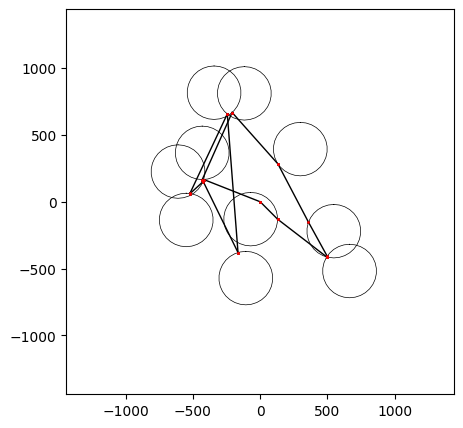

In [3]:
fig, ax = None, None
for c in circles:
    fig, ax = geoVeRoPy.plotCircle(
        fig = fig,
        ax = ax,
        edgeColor = 'black',
        center = circles[c]['center'],
        radius = circles[c]['radius'],
        boundingBox = (-1200, 1200, -1200, 1200))
fig, ax = geoVeRoPy.plotLocSeq(
    fig = fig,
    ax = ax,
    locSeq = seq,
    lineColor = 'black')
fig, ax = geoVeRoPy.plotLocs(
    fig = fig,
    ax = ax,
    locs = seq,
    locColor = 'red')

In [8]:
segSet = geoVeRoPy.segSetSeq2Circle(seq = seq, circles = circles)

In [9]:
for i in range(len(segSet)):
    if (segSet[i]['type'] == 'Segment'):
        segSet[i]['length'] = geoVeRoPy.distEuclideanXY(segSet[i]['shape'][0], segSet[i]['shape'][1])
    else:
        segSet[i]['length'] = 0
# 每个polygon内的seg的集合
for p in circles:
    circles[p]['segSet'] = []
for i in range(len(segSet)):
    for p in segSet[i]['belong']:
        circles[p]['segSet'].append(i)
for p in circles:
    print(p, circles[p]['segSet'])

1 [32, 33]
2 [13, 14]
3 [23, 24, 25, 27, 44, 45, 54, 55, 56]
4 [47, 50]
5 [24, 25, 26, 27, 28, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
6 [0, 1, 2, 30, 35, 58]
7 [4, 5, 6, 7, 8, 9, 10, 11]
8 [17, 20, 37, 38, 39, 40, 41, 42]
9 [5, 6, 6, 7, 7, 8, 9]
10 [16, 17, 18, 19, 20, 21, 38, 41]


#### 1.2 Polygon-shape neighborhoods

In [8]:
nodes = geoVeRoPy.rndNodes(nodeIDs = [i for i in range(1, 11)])
nodes = geoVeRoPy.rndNodeNeighbors(
    nodes = nodes,
    shape = 'RndConvexPoly',
    maxNumSide = 8,
    maxDiag = 30,
    minDiag = 20
)

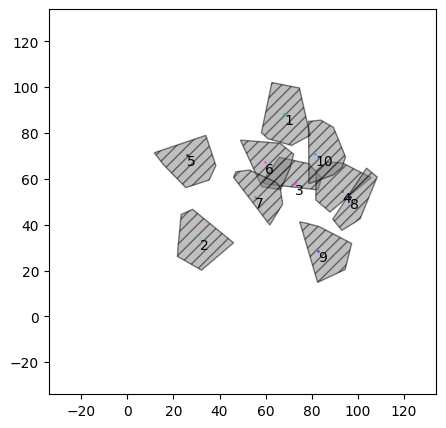

In [9]:
fig, ax = geoVeRoPy.plotNodes(
    nodes = nodes,
    boundingBox = [-20, 120, -20, 120])

In [10]:
cetsp = geoVeRoPy.solveCETSP(
    startLoc = (50, 50),
    endLoc = (50, 50),
    nodes = nodes,
    neighbor = "Poly",
    polyFieldName = 'neighbor',
    algo = "Exact",
    radius = 10)



[0, 2, 5, 6, 1, 10, 3, 4, 8, 9, 7, 11]
---------------------------------------------------------------------------
Residual: 94.3081118193739
Add default cut: - theta >= 2.393 * e[0, 2] + 6.629 * e[2, 5] + 5.995 * e[5, 6] + 16.441 * e[6, 1] + 19.543 * e[1, 10] + 4.115 * e[10, 3] + 10.055 * e[3, 4] + 5.297 * e[4, 8] + 11.236 * e[8, 9] + 9.904 * e[9, 7] + 2.7 * e[7, 11]
Time Pass: 0.12[s]
Cut: subtour - 15, gbc - 1
So far Best Dist: inf
CurrSol Dist: 151.44279204390705
CurrObj: 57.134680224533156
CurrBound: 57.13468022453314


[0, 7, 9, 8, 4, 3, 10, 1, 6, 5, 2, 11]
---------------------------------------------------------------------------
Residual: 94.30819223024773
Add default cut: - theta >= 2.7 * e[0, 7] + 9.904 * e[7, 9] + 11.236 * e[9, 8] + 5.318 * e[8, 4] + 10.052 * e[4, 3] + 4.048 * e[3, 10] + 19.652 * e[10, 1] + 16.38 * e[1, 6] + 5.995 * e[6, 5] + 6.629 * e[5, 2] + 2.393 * e[2, 11]
Time Pass: 0.38[s]
Cut: subtour - 15, gbc - 2
So far Best Dist: 151.44279204390705
CurrSol Dist:

Residual: 58.99991833609772
Add default cut: - theta >= 1.644 * e[0, 7] + 12.166 * e[7, 8] + 3.511 * e[8, 9] + 4.021 * e[9, 4] + 7.672 * e[4, 10] + 6.092 * e[10, 6] + 0.0 * e[6, 3] + 2.669 * e[3, 1] + 12.203 * e[1, 5] + 6.628 * e[5, 2] + 2.394 * e[2, 11]
Time Pass: 2.27[s]
Cut: subtour - 43, gbc - 16
So far Best Dist: 151.44279204390705
CurrSol Dist: 158.14650001477727
CurrObj: 137.06251816512227
CurrBound: 100.26517757573477


[0, 7, 6, 3, 4, 9, 8, 10, 1, 5, 2, 11]
---------------------------------------------------------------------------
Residual: 90.63330897930409
Add default cut: - theta >= 13.952 * e[0, 7] + 0.0 * e[7, 6] + 4.78 * e[6, 3] + 12.102 * e[3, 4] + 4.021 * e[4, 9] + 3.511 * e[9, 8] + 10.43 * e[8, 10] + 19.546 * e[10, 1] + 13.269 * e[1, 5] + 6.629 * e[5, 2] + 2.393 * e[2, 11]
Time Pass: 2.43[s]
Cut: subtour - 43, gbc - 17
So far Best Dist: 151.44279204390705
CurrSol Dist: 163.3744082796107
CurrObj: 131.08457678473982
CurrBound: 100.26517757573477


[0, 2, 5, 1, 10, 9, 8

Residual: 72.21070627442832
Add default cut: - theta >= 0.198 * e[0, 7] + 13.753 * e[7, 6] + 4.662 * e[6, 4] + 4.021 * e[4, 9] + 3.511 * e[9, 8] + 9.474 * e[8, 10] + 11.536 * e[10, 3] + 2.767 * e[3, 1] + 13.267 * e[1, 5] + 6.629 * e[5, 2] + 2.393 * e[2, 11]
Time Pass: 4.4[s]
Cut: subtour - 47, gbc - 31
So far Best Dist: 151.44279204390705
CurrSol Dist: 162.41440828289612
CurrObj: 145.47019946657394
CurrBound: 101.56258238592387


[0, 7, 3, 6, 4, 9, 8, 10, 1, 5, 2, 11]
---------------------------------------------------------------------------
Residual: 79.55045691124538
Add default cut: - theta >= 14.119 * e[0, 7] + 1.107 * e[7, 3] + 0.0 * e[3, 6] + 4.526 * e[6, 4] + 4.021 * e[4, 9] + 3.511 * e[9, 8] + 10.357 * e[8, 10] + 19.741 * e[10, 1] + 13.147 * e[1, 5] + 6.622 * e[5, 2] + 2.4 * e[2, 11]
Time Pass: 4.49[s]
Cut: subtour - 47, gbc - 32
So far Best Dist: 151.44279204390705
CurrSol Dist: 163.55327441360595
CurrObj: 157.7536387510611
CurrBound: 101.56258238592387


[0, 2, 5, 7, 6, 1, 4

Residual: 69.5713953973047
Add default cut: - theta >= 0.075 * e[0, 7] + 7.98 * e[7, 6] + 20.667 * e[6, 1] + 4.776 * e[1, 3] + 9.722 * e[3, 8] + 15.29 * e[8, 4] + 0.0 * e[4, 10] + 2.039 * e[10, 9] + 0.0 * e[9, 5] + 6.629 * e[5, 2] + 2.393 * e[2, 11]
Time Pass: 6.96[s]
Cut: subtour - 55, gbc - 46
So far Best Dist: 151.44279204390705
CurrSol Dist: 178.63702866115884
CurrObj: 154.25101421071875
CurrBound: 105.56523418809977


[0, 7, 9, 8, 4, 1, 10, 3, 6, 5, 2, 11]
---------------------------------------------------------------------------
Residual: 90.8486323342735
Add default cut: - theta >= 2.698 * e[0, 7] + 9.906 * e[7, 9] + 11.614 * e[9, 8] + 22.508 * e[8, 4] + 0.956 * e[4, 1] + 0.0 * e[1, 10] + 15.658 * e[10, 3] + 12.367 * e[3, 6] + 6.119 * e[6, 5] + 6.628 * e[5, 2] + 2.394 * e[2, 11]
Time Pass: 7.18[s]
Cut: subtour - 55, gbc - 47
So far Best Dist: 151.44279204390705
CurrSol Dist: 161.37566193775226
CurrObj: 117.9835335053551
CurrBound: 105.56523418809977


[0, 7, 6, 9, 8, 4, 1, 10, 

Residual: 89.61132534219368
Add default cut: - theta >= 11.077 * e[0, 7] + 4.74 * e[7, 3] + 7.186 * e[3, 1] + 15.415 * e[1, 10] + 12.359 * e[10, 8] + 3.511 * e[8, 9] + 4.021 * e[9, 4] + 12.83 * e[4, 6] + 9.452 * e[6, 5] + 6.629 * e[5, 2] + 2.393 * e[2, 11]
Time Pass: 9.02[s]
Cut: subtour - 67, gbc - 63
So far Best Dist: 151.44279204390705
CurrSol Dist: 170.16422138999476
CurrObj: 122.95580486681828
CurrBound: 111.0607443608997


[0, 6, 4, 9, 8, 3, 1, 10, 7, 2, 5, 11]
---------------------------------------------------------------------------
Residual: 72.41648502461959
Add default cut: - theta >= 6.625 * e[0, 6] + 4.662 * e[6, 4] + 4.021 * e[4, 9] + 3.511 * e[9, 8] + 6.94 * e[8, 3] + 12.22 * e[3, 1] + 0.0 * e[1, 10] + 15.925 * e[10, 7] + 13.57 * e[7, 2] + 4.329 * e[2, 5] + 0.613 * e[5, 11]
Time Pass: 9.14[s]
Cut: subtour - 67, gbc - 64
So far Best Dist: 151.44279204390705
CurrSol Dist: 180.84923672448951
CurrObj: 143.0298789784906
CurrBound: 111.59702873478716


[0, 9, 8, 4, 10, 1, 6, 



[0, 2, 7, 9, 8, 4, 10, 3, 1, 6, 5, 11]
---------------------------------------------------------------------------
Residual: 68.446471540851
Add default cut: - theta >= 1.795 * e[0, 2] + 0.515 * e[2, 7] + 3.142 * e[7, 9] + 10.756 * e[9, 8] + 5.84 * e[8, 4] + 12.786 * e[4, 10] + 12.923 * e[10, 3] + 3.824 * e[3, 1] + 13.912 * e[1, 6] + 0.728 * e[6, 5] + 2.225 * e[5, 11]
Time Pass: 11.53[s]
Cut: subtour - 81, gbc - 80
So far Best Dist: 151.44279204390705
CurrSol Dist: 153.1272046103489
CurrObj: 150.48642768261755
CurrBound: 114.27883515535224


[0, 7, 6, 1, 3, 4, 10, 9, 8, 2, 5, 11]
---------------------------------------------------------------------------
Residual: 65.67576662150066
Add default cut: - theta >= 11.076 * e[0, 7] + 15.703 * e[7, 6] + 1.942 * e[6, 1] + 2.833 * e[1, 3] + 9.81 * e[3, 4] + 0.0 * e[4, 10] + 2.868 * e[10, 9] + 3.455 * e[9, 8] + 6.964 * e[8, 2] + 11.025 * e[2, 5] + 0.0 * e[5, 11]
Time Pass: 11.77[s]
Cut: subtour - 81, gbc - 81
So far Best Dist: 151.442792043907

Residual: 84.21764739697636
Add default cut: - theta >= 11.072 * e[0, 7] + 2.338 * e[7, 1] + 13.506 * e[1, 3] + 2.968 * e[3, 9] + 3.511 * e[9, 8] + 5.854 * e[8, 4] + 12.772 * e[4, 10] + 4.359 * e[10, 6] + 18.815 * e[6, 5] + 6.622 * e[5, 2] + 2.4 * e[2, 11]
Time Pass: 13.54[s]
Cut: subtour - 85, gbc - 95
So far Best Dist: 151.44279204390705
CurrSol Dist: 173.80961654234346
CurrObj: 141.55290533763392
CurrBound: 116.05049606243588


[0, 2, 5, 7, 1, 10, 6, 9, 8, 4, 3, 11]
---------------------------------------------------------------------------
Residual: 84.01014813650232
Add default cut: - theta >= 2.392 * e[0, 2] + 6.63 * e[2, 5] + 3.112 * e[5, 7] + 10.963 * e[7, 1] + 8.823 * e[1, 10] + 3.284 * e[10, 6] + 12.061 * e[6, 9] + 3.511 * e[9, 8] + 8.33 * e[8, 4] + 15.108 * e[4, 3] + 9.797 * e[3, 11]
Time Pass: 13.58[s]
Cut: subtour - 85, gbc - 96
So far Best Dist: 151.44279204390705
CurrSol Dist: 173.14757930139595
CurrObj: 148.88506123557457
CurrBound: 116.05049606243588


[0, 2, 5, 6, 10,

Residual: 82.2694607552891
Add default cut: - theta >= 2.862 * e[0, 1] + 15.415 * e[1, 10] + 6.358 * e[10, 4] + 15.033 * e[4, 8] + 7.105 * e[8, 9] + 5.979 * e[9, 7] + 9.499 * e[7, 3] + 2.276 * e[3, 6] + 8.72 * e[6, 5] + 6.628 * e[5, 2] + 2.394 * e[2, 11]
Time Pass: 15.52[s]
Cut: subtour - 89, gbc - 111
So far Best Dist: 151.44279204390705
CurrSol Dist: 165.26403484185474
CurrObj: 131.04583390857405
CurrBound: 117.49490213339475


[0, 2, 5, 6, 9, 4, 8, 10, 1, 3, 7, 11]
---------------------------------------------------------------------------
Residual: 83.07852066019858
Add default cut: - theta >= 2.394 * e[0, 2] + 6.628 * e[2, 5] + 9.452 * e[5, 6] + 6.833 * e[6, 9] + 5.321 * e[9, 4] + 3.015 * e[4, 8] + 12.902 * e[8, 10] + 13.532 * e[10, 1] + 7.197 * e[1, 3] + 4.728 * e[3, 7] + 11.077 * e[7, 11]
Time Pass: 15.67[s]
Cut: subtour - 89, gbc - 112
So far Best Dist: 151.44279204390705
CurrSol Dist: 165.5596000564141
CurrObj: 136.5042716873002
CurrBound: 117.68558926029155


[0, 5, 2, 9, 8, 

Residual: 78.57804703554397
Add default cut: - theta >= -0.0 * e[0, 5] + 11.084 * e[5, 2] + 6.668 * e[2, 9] + 5.988 * e[9, 4] + 3.015 * e[4, 8] + 1.546 * e[8, 3] + 8.021 * e[3, 10] + 13.534 * e[10, 1] + 20.667 * e[1, 6] + 7.979 * e[6, 7] + 0.075 * e[7, 11]
Time Pass: 18.06[s]
Cut: subtour - 93, gbc - 129
So far Best Dist: 151.44279204390705
CurrSol Dist: 159.87960254900366
CurrObj: 131.51357296257044
CurrBound: 119.47092508720631


[0, 7, 9, 4, 8, 3, 10, 1, 6, 5, 2, 11]
---------------------------------------------------------------------------
Residual: 78.47080408519943
Add default cut: - theta >= 12.383 * e[0, 7] + 0.221 * e[7, 9] + 5.988 * e[9, 4] + 2.998 * e[4, 8] + 1.373 * e[8, 3] + 7.695 * e[3, 10] + 14.725 * e[10, 1] + 18.073 * e[1, 6] + 5.992 * e[6, 5] + 6.627 * e[5, 2] + 2.395 * e[2, 11]
Time Pass: 18.17[s]
Cut: subtour - 93, gbc - 130
So far Best Dist: 151.44279204390705
CurrSol Dist: 152.60887153394125
CurrObj: 141.8401239578169
CurrBound: 119.47092508720631


[0, 1, 10, 3,

Residual: 62.32738497460993
Add default cut: - theta >= 2.396 * e[0, 2] + 6.626 * e[2, 5] + 13.998 * e[5, 1] + 4.777 * e[1, 6] + 5.179 * e[6, 10] + 7.099 * e[10, 3] + 0.726 * e[3, 8] + 2.934 * e[8, 4] + 5.988 * e[4, 9] + 0.224 * e[9, 7] + 12.38 * e[7, 11]
Time Pass: 19.48[s]
Cut: subtour - 93, gbc - 146
So far Best Dist: 151.44279204390705
CurrSol Dist: 152.64270286906407
CurrObj: 136.47783935654152
CurrBound: 120.13112141677378


[0, 2, 5, 7, 6, 1, 10, 3, 9, 8, 4, 11]
---------------------------------------------------------------------------
Residual: 74.35744014039456
Add default cut: - theta >= 2.393 * e[0, 2] + 6.629 * e[2, 5] + 3.112 * e[5, 7] + 7.549 * e[7, 6] + 17.083 * e[6, 1] + 19.835 * e[1, 10] + 2.369 * e[10, 3] + 2.145 * e[3, 9] + 3.511 * e[9, 8] + 3.376 * e[8, 4] + 6.355 * e[4, 11]
Time Pass: 19.86[s]
Cut: subtour - 93, gbc - 147
So far Best Dist: 151.44279204390705
CurrSol Dist: 159.80082359148344
CurrObj: 141.4000864282738
CurrBound: 120.13112141677378


[0, 2, 5, 7, 9,

Residual: 72.63229613968416
Add default cut: - theta >= 6.468 * e[0, 3] + 0.0 * e[3, 6] + 9.162 * e[6, 4] + 6.445 * e[4, 8] + 3.511 * e[8, 9] + 2.175 * e[9, 10] + 20.771 * e[10, 1] + 12.889 * e[1, 5] + 6.251 * e[5, 2] + 4.87 * e[2, 7] + 0.092 * e[7, 11]
Time Pass: 22.32[s]
Cut: subtour - 97, gbc - 161
So far Best Dist: 151.44279204390705
CurrSol Dist: 169.92510808229056
CurrObj: 144.31986232179736
CurrBound: 121.42763166630637


[0, 9, 8, 4, 3, 6, 1, 10, 7, 5, 2, 11]
---------------------------------------------------------------------------
Residual: 87.47683381385853
Add default cut: - theta >= 0.0 * e[0, 9] + 11.236 * e[9, 8] + 4.935 * e[8, 4] + 24.464 * e[4, 3] + 3.635 * e[3, 6] + 4.682 * e[6, 1] + 5.552 * e[1, 10] + 20.838 * e[10, 7] + 3.112 * e[7, 5] + 6.629 * e[5, 2] + 2.393 * e[2, 11]
Time Pass: 22.42[s]
Cut: subtour - 97, gbc - 162
So far Best Dist: 151.44279204390705
CurrSol Dist: 165.22314256312936
CurrObj: 144.24957970095298
CurrBound: 121.42763166630637


[0, 2, 5, 1, 10, 

Residual: 65.6043778744194
Add default cut: - theta >= -0.0 * e[0, 8] + 3.511 * e[8, 9] + 4.021 * e[9, 4] + 7.672 * e[4, 10] + 11.373 * e[10, 3] + 2.275 * e[3, 1] + 17.07 * e[1, 6] + 7.549 * e[6, 7] + 3.112 * e[7, 5] + 6.626 * e[5, 2] + 2.396 * e[2, 11]
Time Pass: 25.53[s]
Cut: subtour - 97, gbc - 176
So far Best Dist: 151.44279204390705
CurrSol Dist: 158.31607737086512
CurrObj: 148.0109927718244
CurrBound: 121.72613093903533


[0, 5, 1, 10, 3, 6, 4, 8, 9, 7, 2, 11]
---------------------------------------------------------------------------
Residual: 65.1273364150726
Add default cut: - theta >= 2.225 * e[0, 5] + 10.75 * e[5, 1] + 8.152 * e[1, 10] + 7.403 * e[10, 3] + 0.664 * e[3, 6] + 13.347 * e[6, 4] + 6.366 * e[4, 8] + 11.206 * e[8, 9] + 2.693 * e[9, 7] + 0.31 * e[7, 2] + 2.011 * e[2, 11]
Time Pass: 25.57[s]
Cut: subtour - 97, gbc - 177
So far Best Dist: 151.44279204390705
CurrSol Dist: 164.03856430662887
CurrObj: 149.00584380790875
CurrBound: 121.72613093903533


[0, 7, 10, 4, 8, 9,

Residual: 66.32785503916612
Add default cut: - theta >= 6.625 * e[0, 6] + 4.662 * e[6, 4] + 4.021 * e[4, 9] + 3.511 * e[9, 8] + 2.639 * e[8, 3] + 3.392 * e[3, 10] + 19.397 * e[10, 1] + 9.947 * e[1, 7] + 3.112 * e[7, 5] + 6.63 * e[5, 2] + 2.392 * e[2, 11]
Time Pass: 27.47[s]
Cut: subtour - 103, gbc - 192
So far Best Dist: 151.44279204390705
CurrSol Dist: 162.58216379514897
CurrObj: 145.72475421537965
CurrBound: 123.40495050477593


[0, 6, 10, 1, 4, 9, 8, 3, 7, 5, 2, 11]
---------------------------------------------------------------------------
Residual: 90.015836499087
Add default cut: - theta >= 19.727 * e[0, 6] + 2.267 * e[6, 10] + 1.83 * e[10, 1] + 13.573 * e[1, 4] + 4.021 * e[4, 9] + 3.511 * e[9, 8] + 20.521 * e[8, 3] + 12.419 * e[3, 7] + 3.125 * e[7, 5] + 6.628 * e[5, 2] + 2.394 * e[2, 11]
Time Pass: 27.53[s]
Cut: subtour - 103, gbc - 193
So far Best Dist: 151.44279204390705
CurrSol Dist: 179.61612295000774
CurrObj: 151.22780396371456
CurrBound: 123.40495050477593


[0, 6, 3, 10, 

Residual: 87.81369637537965
Add default cut: - theta >= 2.394 * e[0, 2] + 6.628 * e[2, 5] + 4.561 * e[5, 7] + 18.961 * e[7, 4] + 4.021 * e[4, 9] + 3.511 * e[9, 8] + 9.284 * e[8, 10] + 18.49 * e[10, 1] + 1.942 * e[1, 6] + 10.985 * e[6, 3] + 7.036 * e[3, 11]
Time Pass: 29.44[s]
Cut: subtour - 105, gbc - 208
So far Best Dist: 151.44279204390705
CurrSol Dist: 170.0866779308758
CurrObj: 137.57964457570463
CurrBound: 123.8906000967934


[0, 9, 8, 10, 4, 6, 1, 3, 7, 2, 5, 11]
---------------------------------------------------------------------------
Residual: 60.309593080585614
Add default cut: - theta >= 0.0 * e[0, 9] + 11.236 * e[9, 8] + 9.092 * e[8, 10] + 0.0 * e[10, 4] + 3.974 * e[4, 6] + 3.462 * e[6, 1] + 1.184 * e[1, 3] + 21.197 * e[3, 7] + 5.006 * e[7, 2] + 4.717 * e[2, 5] + 0.442 * e[5, 11]
Time Pass: 29.51[s]
Cut: subtour - 105, gbc - 209
So far Best Dist: 151.44279204390705
CurrSol Dist: 161.2084461254036
CurrObj: 151.70379107539827
CurrBound: 123.93515770475504


[0, 6, 1, 9, 8, 4



[0, 3, 7, 9, 8, 10, 4, 6, 1, 5, 2, 11]
---------------------------------------------------------------------------
Residual: 63.94967418657457
Add default cut: - theta >= 2.197 * e[0, 3] + 6.542 * e[3, 7] + 7.912 * e[7, 9] + 6.435 * e[9, 8] + 9.092 * e[8, 10] + 0.0 * e[10, 4] + 3.974 * e[4, 6] + 4.778 * e[6, 1] + 13.997 * e[1, 5] + 6.629 * e[5, 2] + 2.393 * e[2, 11]
Time Pass: 31.46[s]
Cut: subtour - 107, gbc - 224
So far Best Dist: 151.44279204390705
CurrSol Dist: 159.78643567217546
CurrObj: 150.41779687478683
CurrBound: 124.73110076310036


[0, 7, 9, 8, 10, 3, 4, 6, 1, 5, 2, 11]
---------------------------------------------------------------------------
Residual: 65.63860154776283
Add default cut: - theta >= 2.699 * e[0, 7] + 9.905 * e[7, 9] + 11.236 * e[9, 8] + 9.059 * e[8, 10] + 3.735 * e[10, 3] + 0.0 * e[3, 4] + 1.207 * e[4, 6] + 4.778 * e[6, 1] + 13.998 * e[1, 5] + 6.629 * e[5, 2] + 2.393 * e[2, 11]
Time Pass: 31.7[s]
Cut: subtour - 107, gbc - 225
So far Best Dist: 151.44279204

Residual: 81.62527689885692
Add default cut: - theta >= 0.741 * e[0, 5] + 4.121 * e[5, 2] + 5.217 * e[2, 7] + 12.732 * e[7, 1] + 15.414 * e[1, 10] + 12.36 * e[10, 8] + 3.511 * e[8, 9] + 4.021 * e[9, 4] + 12.099 * e[4, 3] + 4.785 * e[3, 6] + 6.625 * e[6, 11]
Time Pass: 33.96[s]
Cut: subtour - 107, gbc - 240
So far Best Dist: 151.44279204390705
CurrSol Dist: 172.49947766874163
CurrObj: 144.58406663112285
CurrBound: 125.03189408254046


[0, 1, 10, 8, 9, 4, 3, 6, 7, 5, 2, 11]
---------------------------------------------------------------------------
Residual: 85.53565637917318
Add default cut: - theta >= 2.862 * e[0, 1] + 15.411 * e[1, 10] + 12.363 * e[10, 8] + 3.511 * e[8, 9] + 4.021 * e[9, 4] + 22.801 * e[4, 3] + 2.276 * e[3, 6] + 10.147 * e[6, 7] + 3.122 * e[7, 5] + 6.629 * e[5, 2] + 2.393 * e[2, 11]
Time Pass: 34.04[s]
Cut: subtour - 107, gbc - 241
So far Best Dist: 151.44279204390705
CurrSol Dist: 170.4185412775697
CurrObj: 149.13128073745875
CurrBound: 125.03189408254046


[0, 3, 8,

Residual: 89.1666069793613
Add default cut: - theta >= 0.0 * e[0, 5] + 11.084 * e[5, 2] + 6.668 * e[2, 9] + 11.236 * e[9, 8] + 16.162 * e[8, 10] + 11.722 * e[10, 1] + 0.846 * e[1, 4] + 0.496 * e[4, 3] + 15.303 * e[3, 6] + 15.551 * e[6, 7] + 0.098 * e[7, 11]
Time Pass: 35.59[s]
Cut: subtour - 107, gbc - 255
So far Best Dist: 151.44279204390705
CurrSol Dist: 175.88874794457556
CurrObj: 142.4900356177497
CurrBound: 126.18862064740684


[0, 2, 5, 7, 9, 8, 4, 1, 10, 6, 3, 11]
---------------------------------------------------------------------------
Residual: 89.94016363154259
Add default cut: - theta >= 2.393 * e[0, 2] + 6.629 * e[2, 5] + 10.49 * e[5, 7] + 13.432 * e[7, 9] + 11.609 * e[9, 8] + 22.512 * e[8, 4] + 0.957 * e[4, 1] + 0.0 * e[1, 10] + 3.749 * e[10, 6] + 18.169 * e[6, 3] + 0.0 * e[3, 11]
Time Pass: 35.78[s]
Cut: subtour - 109, gbc - 256
So far Best Dist: 151.44279204390705
CurrSol Dist: 171.20312438356532
CurrObj: 140.55618074415216
CurrBound: 126.33817662507194


[0, 2, 5, 1, 

Residual: 74.44811540554184
Add default cut: - theta >= 2.393 * e[0, 2] + 6.629 * e[2, 5] + 3.112 * e[5, 7] + 19.924 * e[7, 3] + 1.183 * e[3, 1] + 3.463 * e[1, 6] + 6.308 * e[6, 10] + 5.963 * e[10, 4] + 14.237 * e[4, 8] + 11.236 * e[8, 9] + -0.0 * e[9, 11]
Time Pass: 38.03[s]
Cut: subtour - 109, gbc - 271
So far Best Dist: 151.44279204390705
CurrSol Dist: 152.36601167148248
CurrObj: 140.42069211452886
CurrBound: 127.46713665278669


[0, 2, 5, 6, 3, 8, 9, 4, 10, 1, 7, 11]
---------------------------------------------------------------------------
Residual: 87.46322077796768
Add default cut: - theta >= 2.396 * e[0, 2] + 6.626 * e[2, 5] + 8.719 * e[5, 6] + 2.277 * e[6, 3] + 20.521 * e[3, 8] + 3.511 * e[8, 9] + 4.021 * e[9, 4] + 7.672 * e[4, 10] + 18.31 * e[10, 1] + 13.335 * e[1, 7] + 0.075 * e[7, 11]
Time Pass: 38.14[s]
Cut: subtour - 109, gbc - 272
So far Best Dist: 151.44279204390705
CurrSol Dist: 169.67820646805748
CurrObj: 139.27725876958246
CurrBound: 127.46713665278669


[0, 5, 2, 7



[0, 6, 7, 9, 8, 10, 4, 3, 1, 5, 2, 11]
---------------------------------------------------------------------------
Residual: 69.0271968811603
Add default cut: - theta >= 3.445 * e[0, 6] + 5.664 * e[6, 7] + 6.767 * e[7, 9] + 6.817 * e[9, 8] + 9.092 * e[8, 10] + 0.0 * e[10, 4] + 9.917 * e[4, 3] + 2.961 * e[3, 1] + 15.343 * e[1, 5] + 6.629 * e[5, 2] + 2.394 * e[2, 11]
Time Pass: 40.79[s]
Cut: subtour - 109, gbc - 289
So far Best Dist: 151.44279204390705
CurrSol Dist: 157.89009803659994
CurrObj: 147.084327076503
CurrBound: 128.00114280058628


[0, 7, 9, 8, 4, 10, 6, 1, 3, 5, 2, 11]
---------------------------------------------------------------------------
Residual: 74.85014685627759
Add default cut: - theta >= 2.698 * e[0, 7] + 9.906 * e[7, 9] + 11.236 * e[9, 8] + 14.237 * e[8, 4] + 5.961 * e[4, 10] + 6.309 * e[10, 6] + 3.464 * e[6, 1] + 1.182 * e[1, 3] + 10.834 * e[3, 5] + 6.629 * e[5, 2] + 2.393 * e[2, 11]
Time Pass: 40.9[s]
Cut: subtour - 109, gbc - 290
So far Best Dist: 151.44279204

Residual: 75.18986187663819
Add default cut: - theta >= 0.46 * e[0, 5] + 4.585 * e[5, 2] + 15.197 * e[2, 3] + 4.952 * e[3, 6] + 1.956 * e[6, 1] + 18.779 * e[1, 10] + 7.654 * e[10, 8] + 3.016 * e[8, 4] + 5.988 * e[4, 9] + 0.224 * e[9, 7] + 12.381 * e[7, 11]
Time Pass: 42.67[s]
Cut: subtour - 109, gbc - 306
So far Best Dist: 151.44279204390705
CurrSol Dist: 161.7763942806631
CurrObj: 150.9220344814809
CurrBound: 129.00181146535627


[0, 2, 5, 3, 7, 9, 8, 10, 4, 1, 6, 11]
---------------------------------------------------------------------------
Residual: 70.40806457195116
Add default cut: - theta >= 2.392 * e[0, 2] + 6.63 * e[2, 5] + 3.344 * e[5, 3] + 9.499 * e[3, 7] + 5.98 * e[7, 9] + 7.105 * e[9, 8] + 9.092 * e[8, 10] + 0.0 * e[10, 4] + 4.97 * e[4, 1] + 20.668 * e[1, 6] + 0.728 * e[6, 11]
Time Pass: 42.82[s]
Cut: subtour - 111, gbc - 307
So far Best Dist: 151.44279204390705
CurrSol Dist: 165.42568057174424
CurrObj: 150.10226294903174
CurrBound: 129.00181146535627


[0, 3, 1, 6, 10, 8,

Residual: 82.48394362785137
Add default cut: - theta >= 2.37 * e[0, 2] + 6.652 * e[2, 5] + 15.579 * e[5, 1] + 8.821 * e[1, 10] + 4.404 * e[10, 3] + 5.408 * e[3, 6] + 12.061 * e[6, 9] + 3.511 * e[9, 8] + 3.376 * e[8, 4] + 6.656 * e[4, 7] + 13.646 * e[7, 11]
Time Pass: 44.49[s]
Cut: subtour - 111, gbc - 321
So far Best Dist: 151.44279204390705
CurrSol Dist: 169.23606352111597
CurrObj: 149.70096995828476
CurrBound: 129.84083843428058


[0, 2, 5, 7, 6, 8, 9, 4, 10, 1, 3, 11]
---------------------------------------------------------------------------
Residual: 78.60029358538313
Add default cut: - theta >= 2.39 * e[0, 2] + 6.632 * e[2, 5] + 3.76 * e[5, 7] + 10.24 * e[7, 6] + 7.821 * e[6, 8] + 3.511 * e[8, 9] + 4.021 * e[9, 4] + 7.672 * e[4, 10] + 18.309 * e[10, 1] + 0.849 * e[1, 3] + 13.395 * e[3, 11]
Time Pass: 44.54[s]
Cut: subtour - 111, gbc - 322
So far Best Dist: 151.44279204390705
CurrSol Dist: 169.11544639821503
CurrObj: 144.54739714880336
CurrBound: 129.84083843428058


[0, 2, 5, 6, 

Residual: 67.8308004654876
Add default cut: - theta >= 1.002 * e[0, 6] + 2.214 * e[6, 3] + 8.858 * e[3, 9] + 3.211 * e[9, 4] + 3.015 * e[4, 8] + 12.902 * e[8, 10] + 13.532 * e[10, 1] + 10.963 * e[1, 7] + 3.112 * e[7, 5] + 6.631 * e[5, 2] + 2.391 * e[2, 11]
Time Pass: 46.73[s]
Cut: subtour - 111, gbc - 335
So far Best Dist: 151.44279204390705
CurrSol Dist: 161.14398315885404
CurrObj: 150.81746937813926
CurrBound: 130.34261057904547


[0, 2, 5, 1, 10, 4, 8, 9, 7, 3, 6, 11]
---------------------------------------------------------------------------
Residual: 85.81632404624179
Add default cut: - theta >= 2.392 * e[0, 2] + 6.63 * e[2, 5] + 13.256 * e[5, 1] + 19.563 * e[1, 10] + 14.152 * e[10, 4] + 5.306 * e[4, 8] + 6.434 * e[8, 9] + 7.915 * e[9, 7] + 6.539 * e[7, 3] + 2.316 * e[3, 6] + 1.314 * e[6, 11]
Time Pass: 46.78[s]
Cut: subtour - 111, gbc - 336
So far Best Dist: 151.44279204390705
CurrSol Dist: 159.4467173985565
CurrObj: 148.45890856926934
CurrBound: 130.34261057904547


[0, 6, 10, 1

Residual: 71.09252229842973
Add default cut: - theta >= 0.0 * e[0, 9] + 11.236 * e[9, 8] + 9.092 * e[8, 10] + 0.0 * e[10, 4] + 9.81 * e[4, 3] + 2.833 * e[3, 1] + 19.002 * e[1, 6] + 0.922 * e[6, 7] + 13.333 * e[7, 2] + 4.12 * e[2, 5] + 0.744 * e[5, 11]
Time Pass: 48.37[s]
Cut: subtour - 111, gbc - 350
So far Best Dist: 151.44279204390705
CurrSol Dist: 160.72965714119374
CurrObj: 151.2587069966887
CurrBound: 130.60718763639892


[0, 2, 5, 6, 7, 9, 8, 1, 10, 4, 3, 11]
---------------------------------------------------------------------------
Residual: 87.57402714894876
Add default cut: - theta >= 2.394 * e[0, 2] + 6.628 * e[2, 5] + 9.452 * e[5, 6] + 11.566 * e[6, 7] + 3.448 * e[7, 9] + 8.071 * e[9, 8] + 8.605 * e[8, 1] + 8.794 * e[1, 10] + 5.925 * e[10, 4] + 16.926 * e[4, 3] + 5.765 * e[3, 11]
Time Pass: 48.53[s]
Cut: subtour - 111, gbc - 351
So far Best Dist: 151.44279204390705
CurrSol Dist: 181.29566954280256
CurrObj: 151.4387706681275
CurrBound: 130.82133796612518


[0, 2, 5, 6, 10, 1

Residual: 87.18946741852724
Add default cut: - theta >= 2.4 * e[0, 2] + 6.622 * e[2, 5] + 13.26 * e[5, 1] + 20.509 * e[1, 10] + 13.173 * e[10, 4] + 5.334 * e[4, 8] + 6.461 * e[8, 9] + 5.612 * e[9, 6] + 2.624 * e[6, 3] + 11.182 * e[3, 7] + 0.012 * e[7, 11]
Time Pass: 50.96[s]
Cut: subtour - 113, gbc - 366
So far Best Dist: 151.44279204390705
CurrSol Dist: 159.44953059398907
CurrObj: 149.9863010981265
CurrBound: 131.77976260362826


[0, 6, 1, 3, 10, 4, 9, 8, 7, 2, 5, 11]
---------------------------------------------------------------------------
Residual: 70.99504461758718
Add default cut: - theta >= 0.735 * e[0, 6] + 20.661 * e[6, 1] + 1.521 * e[1, 3] + 10.587 * e[3, 10] + 7.672 * e[10, 4] + 4.021 * e[4, 9] + 3.511 * e[9, 8] + 4.285 * e[8, 7] + 6.973 * e[7, 2] + 11.029 * e[2, 5] + 0.0 * e[5, 11]
Time Pass: 51.04[s]
Cut: subtour - 113, gbc - 367
So far Best Dist: 151.44279204390705
CurrSol Dist: 166.4371853137999
CurrObj: 151.3603217319273
CurrBound: 131.77976260362826


[0, 2, 5, 1, 6, 

Residual: 91.90995227424806
Add default cut: - theta >= 2.394 * e[0, 2] + 6.628 * e[2, 5] + 7.953 * e[5, 1] + 1.201 * e[1, 6] + 20.144 * e[6, 7] + 11.821 * e[7, 9] + 5.401 * e[9, 8] + 5.843 * e[8, 4] + 12.783 * e[4, 10] + 6.01 * e[10, 3] + 11.732 * e[3, 11]
Time Pass: 52.82[s]
Cut: subtour - 113, gbc - 382
So far Best Dist: 151.44279204390705
CurrSol Dist: 167.45337226077726
CurrObj: 147.47686861238105
CurrBound: 132.20269958031642


[0, 7, 6, 3, 10, 8, 9, 4, 1, 5, 2, 11]
---------------------------------------------------------------------------
Residual: 80.0644174870835
Add default cut: - theta >= 0.198 * e[0, 7] + 13.753 * e[7, 6] + 5.567 * e[6, 3] + 7.017 * e[3, 10] + 9.594 * e[10, 8] + 3.511 * e[8, 9] + 4.021 * e[9, 4] + 15.176 * e[4, 1] + 12.205 * e[1, 5] + 6.629 * e[5, 2] + 2.393 * e[2, 11]
Time Pass: 52.92[s]
Cut: subtour - 113, gbc - 383
So far Best Dist: 151.44279204390705
CurrSol Dist: 166.67901100089082
CurrObj: 147.1635882591094
CurrBound: 132.20269958031642


[0, 2, 5, 1

Residual: 61.56878636692075
Add default cut: - theta >= 3.443 * e[0, 6] + 6.48 * e[6, 9] + 6.814 * e[9, 8] + 9.092 * e[8, 10] + 0.0 * e[10, 4] + 9.808 * e[4, 3] + 2.835 * e[3, 1] + 10.963 * e[1, 7] + 3.112 * e[7, 5] + 6.629 * e[5, 2] + 2.393 * e[2, 11]
Time Pass: 55.78[s]
Cut: subtour - 113, gbc - 399
So far Best Dist: 151.44279204390705
CurrSol Dist: 157.98039905023427
CurrObj: 148.14733864842424
CurrBound: 132.9440825799683


[0, 2, 5, 7, 1, 3, 10, 8, 4, 9, 6, 11]
---------------------------------------------------------------------------
Residual: 58.21903446362634
Add default cut: - theta >= 2.393 * e[0, 2] + 6.629 * e[2, 5] + 3.112 * e[5, 7] + 10.963 * e[7, 1] + 2.704 * e[1, 3] + 9.874 * e[3, 10] + 7.654 * e[10, 8] + 3.016 * e[8, 4] + 4.178 * e[4, 9] + 4.984 * e[9, 6] + 2.712 * e[6, 11]
Time Pass: 56.23[s]
Cut: subtour - 113, gbc - 400
So far Best Dist: 151.44279204390705
CurrSol Dist: 159.2699615252354
CurrObj: 148.9396932844326
CurrBound: 133.0376960727582


[0, 7, 3, 1, 10, 4, 

Residual: 77.24552056141978
Add default cut: - theta >= 0.041 * e[0, 3] + 18.133 * e[3, 6] + 3.744 * e[6, 10] + 0.0 * e[10, 1] + 20.163 * e[1, 4] + 3.307 * e[4, 8] + 11.608 * e[8, 9] + 2.951 * e[9, 7] + 6.215 * e[7, 2] + 11.084 * e[2, 5] + 0.0 * e[5, 11]
Time Pass: 59.28[s]
Cut: subtour - 113, gbc - 415
So far Best Dist: 151.44279204390705
CurrSol Dist: 167.72254107829386
CurrObj: 150.3701121492096
CurrBound: 133.78411537075198


[0, 2, 5, 1, 3, 9, 8, 4, 10, 6, 7, 11]
---------------------------------------------------------------------------
Residual: 82.43675925363158
Add default cut: - theta >= 2.395 * e[0, 2] + 6.627 * e[2, 5] + 10.118 * e[5, 1] + 16.867 * e[1, 3] + 4.284 * e[3, 9] + 3.511 * e[9, 8] + 13.175 * e[8, 4] + 5.451 * e[4, 10] + 6.056 * e[10, 6] + 0.0 * e[6, 7] + 13.952 * e[7, 11]
Time Pass: 59.84[s]
Cut: subtour - 113, gbc - 416
So far Best Dist: 151.44279204390705
CurrSol Dist: 165.88729155811086
CurrObj: 151.38295264745736
CurrBound: 133.78411537075198


[0, 7, 1, 10, 

Residual: 70.51925270711122
Add default cut: - theta >= 2.39 * e[0, 2] + 6.632 * e[2, 5] + 3.112 * e[5, 7] + 7.53 * e[7, 6] + 18.744 * e[6, 1] + 13.328 * e[1, 10] + 8.367 * e[10, 3] + 1.415 * e[3, 8] + 3.014 * e[8, 4] + 5.988 * e[4, 9] + -0.0 * e[9, 11]
Time Pass: 61.35[s]
Cut: subtour - 113, gbc - 431
So far Best Dist: 151.44279204390705
CurrSol Dist: 152.71320720610765
CurrObj: 147.12014226268434
CurrBound: 134.44919818998997


[0, 7, 6, 1, 10, 3, 8, 4, 9, 2, 5, 11]
---------------------------------------------------------------------------
Residual: 78.57817724983533
Add default cut: - theta >= 0.07 * e[0, 7] + 26.71 * e[7, 6] + 1.942 * e[6, 1] + 13.528 * e[1, 10] + 8.024 * e[10, 3] + 1.545 * e[3, 8] + 3.018 * e[8, 4] + 5.988 * e[4, 9] + 6.666 * e[9, 2] + 11.086 * e[2, 5] + 0.0 * e[5, 11]
Time Pass: 61.47[s]
Cut: subtour - 113, gbc - 432
So far Best Dist: 151.44279204390705
CurrSol Dist: 159.879732763295
CurrObj: 149.76251350411852
CurrBound: 134.44919818998997


[0, 6, 1, 10, 3, 8,

Residual: 76.64057597018649
Add default cut: - theta >= 2.393 * e[0, 2] + 6.629 * e[2, 5] + 14.892 * e[5, 1] + 14.757 * e[1, 10] + 12.374 * e[10, 8] + 2.997 * e[8, 4] + 3.835 * e[4, 9] + 8.426 * e[9, 3] + 2.166 * e[3, 6] + 8.167 * e[6, 7] + 0.005 * e[7, 11]
Time Pass: 63.7[s]
Cut: subtour - 113, gbc - 447
So far Best Dist: 151.44279204390705
CurrSol Dist: 161.0347169588261
CurrObj: 148.17977282303346
CurrBound: 135.41916216576274


[0, 2, 5, 3, 1, 10, 8, 4, 9, 6, 7, 11]
---------------------------------------------------------------------------
Residual: 69.69325433292715
Add default cut: - theta >= 2.394 * e[0, 2] + 6.628 * e[2, 5] + 10.834 * e[5, 3] + 1.188 * e[3, 1] + 18.778 * e[1, 10] + 7.656 * e[10, 8] + 3.015 * e[8, 4] + 4.169 * e[4, 9] + 4.998 * e[9, 6] + 9.979 * e[6, 7] + 0.054 * e[7, 11]
Time Pass: 64.15[s]
Cut: subtour - 113, gbc - 448
So far Best Dist: 151.44279204390705
CurrSol Dist: 159.82609999221424
CurrObj: 148.48791718815937
CurrBound: 135.41916216576274


[0, 5, 2, 7,

Residual: 68.33922068733929
Add default cut: - theta >= 12.38 * e[0, 7] + 0.224 * e[7, 9] + 11.236 * e[9, 8] + 2.797 * e[8, 3] + 2.963 * e[3, 10] + 0.0 * e[10, 4] + 5.21 * e[4, 1] + 18.513 * e[1, 6] + 5.995 * e[6, 5] + 6.629 * e[5, 2] + 2.393 * e[2, 11]
Time Pass: 67.04[s]
Cut: subtour - 115, gbc - 462
So far Best Dist: 151.44279204390705
CurrSol Dist: 151.7114679712863
CurrObj: 145.89588040845197
CurrBound: 136.25573498480483


[0, 2, 5, 1, 3, 10, 8, 9, 4, 6, 7, 11]
---------------------------------------------------------------------------
Residual: 72.21330598304023
Add default cut: - theta >= 2.396 * e[0, 2] + 6.626 * e[2, 5] + 13.254 * e[5, 1] + 2.77 * e[1, 3] + 11.545 * e[3, 10] + 9.475 * e[10, 8] + 3.511 * e[8, 9] + 4.021 * e[9, 4] + 4.662 * e[4, 6] + 0.001 * e[6, 7] + 13.952 * e[7, 11]
Time Pass: 67.19[s]
Cut: subtour - 115, gbc - 463
So far Best Dist: 151.44279204390705
CurrSol Dist: 162.417007991508
CurrObj: 151.15981365134337
CurrBound: 136.25573498480483


[0, 5, 2, 9, 4, 8

Residual: 89.34189422998219
Add default cut: - theta >= 2.393 * e[0, 2] + 6.629 * e[2, 5] + 6.119 * e[5, 6] + 12.367 * e[6, 3] + 1.188 * e[3, 1] + 15.393 * e[1, 10] + 16.942 * e[10, 4] + 4.47 * e[4, 8] + 11.236 * e[8, 9] + 9.907 * e[9, 7] + 2.697 * e[7, 11]
Time Pass: 69.46[s]
Cut: subtour - 115, gbc - 477
So far Best Dist: 151.44279204390705
CurrSol Dist: 152.19631412606742
CurrObj: 141.19034601978638
CurrBound: 136.72837150906275


[0, 7, 1, 6, 3, 10, 4, 8, 9, 2, 5, 11]
---------------------------------------------------------------------------
Residual: 78.89098908749887
Add default cut: - theta >= 0.075 * e[0, 7] + 13.335 * e[7, 1] + 3.458 * e[1, 6] + 3.634 * e[6, 3] + 10.979 * e[3, 10] + 13.485 * e[10, 4] + 4.936 * e[4, 8] + 11.236 * e[8, 9] + 6.668 * e[9, 2] + 11.085 * e[2, 5] + 0.0 * e[5, 11]
Time Pass: 69.72[s]
Cut: subtour - 115, gbc - 478
So far Best Dist: 151.44279204390705
CurrSol Dist: 158.9814001783044
CurrObj: 148.99118289959142
CurrBound: 137.08199065594184


[0, 5, 2, 

Residual: 100.94890327163121
Add default cut: - theta >= 7.068 * e[0, 3] + 10.954 * e[3, 6] + 1.942 * e[6, 1] + 15.414 * e[1, 10] + 6.354 * e[10, 4] + 15.038 * e[4, 8] + 11.236 * e[8, 9] + 13.427 * e[9, 7] + 10.495 * e[7, 5] + 6.629 * e[5, 2] + 2.393 * e[2, 11]
Time Pass: 73.13[s]
Cut: subtour - 115, gbc - 493
So far Best Dist: 151.44279204390705
CurrSol Dist: 162.29307015966276
CurrObj: 147.5888380896698
CurrBound: 137.57964457570463


[0, 2, 5, 6, 1, 4, 10, 8, 9, 3, 7, 11]
---------------------------------------------------------------------------
Residual: 75.25671202848994
Add default cut: - theta >= 2.391 * e[0, 2] + 6.631 * e[2, 5] + 22.385 * e[5, 6] + 2.123 * e[6, 1] + 5.209 * e[1, 4] + 0.0 * e[4, 10] + 9.092 * e[10, 8] + 6.433 * e[8, 9] + 10.037 * e[9, 3] + 10.941 * e[3, 7] + 0.014 * e[7, 11]
Time Pass: 73.27[s]
Cut: subtour - 115, gbc - 494
So far Best Dist: 151.44279204390705
CurrSol Dist: 159.71537172622317
CurrObj: 151.31526817080663
CurrBound: 137.59141068006645


[0, 2, 5

Residual: 88.40611854026803
Add default cut: - theta >= 0.075 * e[0, 7] + 7.979 * e[7, 6] + 20.667 * e[6, 1] + 7.896 * e[1, 4] + 15.036 * e[4, 8] + 3.511 * e[8, 9] + 2.175 * e[9, 10] + 20.319 * e[10, 3] + 1.726 * e[3, 5] + 6.629 * e[5, 2] + 2.393 * e[2, 11]
Time Pass: 77.74[s]
Cut: subtour - 115, gbc - 509
So far Best Dist: 151.44279204390705
CurrSol Dist: 173.82474607930516
CurrObj: 147.48216364436877
CurrBound: 138.3376208912053


[0, 3, 1, 10, 8, 4, 9, 6, 5, 2, 7, 11]
---------------------------------------------------------------------------
Residual: 76.51193003048645
Add default cut: - theta >= 5.63 * e[0, 3] + 8.615 * e[3, 1] + 18.781 * e[1, 10] + 7.648 * e[10, 8] + 3.02 * e[8, 4] + 5.33 * e[4, 9] + 6.824 * e[9, 6] + 9.452 * e[6, 5] + 6.254 * e[5, 2] + 4.868 * e[2, 7] + 0.091 * e[7, 11]
Time Pass: 77.8[s]
Cut: subtour - 115, gbc - 510
So far Best Dist: 151.44279204390705
CurrSol Dist: 171.961074978678
CurrObj: 149.11137147149495
CurrBound: 138.6605418542364


[0, 3, 1, 6, 10, 4,

Residual: 86.16339712280006
Add default cut: - theta >= 0.0 * e[0, 9] + 11.236 * e[9, 8] + 4.487 * e[8, 4] + 10.25 * e[4, 3] + 6.64 * e[3, 10] + 15.428 * e[10, 1] + 19.002 * e[1, 6] + 9.041 * e[6, 7] + 5.214 * e[7, 2] + 4.13 * e[2, 5] + 0.735 * e[5, 11]
Time Pass: 80.52[s]
Cut: subtour - 115, gbc - 524
So far Best Dist: 151.44279204390705
CurrSol Dist: 160.56802416243917
CurrObj: 151.09023834787735
CurrBound: 139.1972318348199


[0, 7, 4, 8, 9, 3, 1, 10, 6, 5, 2, 11]
---------------------------------------------------------------------------
Residual: 82.10019697696129
Add default cut: - theta >= 13.583 * e[0, 7] + 6.719 * e[7, 4] + 3.376 * e[4, 8] + 3.511 * e[8, 9] + 1.543 * e[9, 3] + 17.26 * e[3, 1] + 0.0 * e[1, 10] + 21.096 * e[10, 6] + 5.991 * e[6, 5] + 6.629 * e[5, 2] + 2.393 * e[2, 11]
Time Pass: 80.62[s]
Cut: subtour - 115, gbc - 525
So far Best Dist: 151.44279204390705
CurrSol Dist: 170.39198003857666
CurrObj: 149.8847960663253
CurrBound: 139.2329489704796


[0, 2, 5, 6, 1, 7, 

Residual: 81.74040110301324
Add default cut: - theta >= 0.253 * e[0, 7] + 20.234 * e[7, 3] + 6.012 * e[3, 10] + 2.175 * e[10, 9] + 3.511 * e[9, 8] + 13.741 * e[8, 4] + 10.177 * e[4, 6] + 3.346 * e[6, 1] + 13.269 * e[1, 5] + 6.628 * e[5, 2] + 2.394 * e[2, 11]
Time Pass: 82.59[s]
Cut: subtour - 115, gbc - 540
So far Best Dist: 151.44279204390705
CurrSol Dist: 166.54629232819877
CurrObj: 150.32709466647893
CurrBound: 140.42967845059297


[0, 2, 5, 6, 1, 3, 10, 8, 4, 9, 7, 11]
---------------------------------------------------------------------------
Residual: 75.60234290909285
Add default cut: - theta >= 2.394 * e[0, 2] + 6.628 * e[2, 5] + 5.992 * e[5, 6] + 18.07 * e[6, 1] + 2.923 * e[1, 3] + 10.262 * e[3, 10] + 7.744 * e[10, 8] + 2.997 * e[8, 4] + 5.988 * e[4, 9] + 0.224 * e[9, 7] + 12.381 * e[7, 11]
Time Pass: 82.77[s]
Cut: subtour - 115, gbc - 541
So far Best Dist: 151.44279204390705
CurrSol Dist: 152.6088453150464
CurrObj: 142.95625090392687
CurrBound: 140.42967845059297


[0, 2, 5, 

Residual: 80.06440343489805
Add default cut: - theta >= 2.393 * e[0, 2] + 6.629 * e[2, 5] + 12.205 * e[5, 1] + 15.176 * e[1, 4] + 4.021 * e[4, 9] + 3.511 * e[9, 8] + 9.594 * e[8, 10] + 7.019 * e[10, 3] + 5.564 * e[3, 6] + 13.753 * e[6, 7] + 0.198 * e[7, 11]
Time Pass: 84.47[s]
Cut: subtour - 115, gbc - 555
So far Best Dist: 151.44279204390705
CurrSol Dist: 166.67899694870533
CurrObj: 146.83292964103407
CurrBound: 141.52500207578294


[0, 5, 2, 4, 8, 9, 10, 3, 1, 6, 7, 11]
---------------------------------------------------------------------------
Residual: 70.88452255736685
Add default cut: - theta >= 0.0 * e[0, 5] + 10.095 * e[5, 2] + 10.898 * e[2, 4] + 3.376 * e[4, 8] + 3.511 * e[8, 9] + 2.175 * e[9, 10] + 10.589 * e[10, 3] + 1.52 * e[3, 1] + 1.942 * e[1, 6] + 15.704 * e[6, 7] + 11.075 * e[7, 11]
Time Pass: 84.75[s]
Cut: subtour - 115, gbc - 556
So far Best Dist: 151.44279204390705
CurrSol Dist: 168.69223735380626
CurrObj: 148.1356174196767
CurrBound: 141.55682531233018


[0, 7, 1, 1

Residual: 66.32335091775552
Add default cut: - theta >= 0.092 * e[0, 7] + 4.871 * e[7, 2] + 6.249 * e[2, 5] + 10.114 * e[5, 1] + 2.457 * e[1, 3] + 18.699 * e[3, 9] + 3.511 * e[9, 8] + 9.092 * e[8, 10] + 0.0 * e[10, 4] + 4.614 * e[4, 6] + 6.625 * e[6, 11]
Time Pass: 87.08[s]
Cut: subtour - 115, gbc - 571
So far Best Dist: 151.44279204390705
CurrSol Dist: 175.07696398857746
CurrObj: 150.16117891832613
CurrBound: 143.0644792856424


[0, 2, 5, 7, 9, 8, 4, 6, 1, 10, 3, 11]
---------------------------------------------------------------------------
Residual: 100.96204148876481
Add default cut: - theta >= 2.41 * e[0, 2] + 6.612 * e[2, 5] + 10.459 * e[5, 7] + 13.463 * e[7, 9] + 11.236 * e[9, 8] + 14.228 * e[8, 4] + 7.544 * e[4, 6] + 3.766 * e[6, 1] + 8.209 * e[1, 10] + 4.775 * e[10, 3] + 18.26 * e[3, 11]
Time Pass: 87.16[s]
Cut: subtour - 115, gbc - 572
So far Best Dist: 151.44279204390705
CurrSol Dist: 173.56792657885032
CurrObj: 144.4171501655036
CurrBound: 143.12384767146096


[0, 9, 4, 8, 

Residual: 75.70961340384474
Add default cut: - theta >= 0.0 * e[0, 5] + 11.084 * e[5, 2] + 6.668 * e[2, 9] + 5.988 * e[9, 4] + 3.016 * e[4, 8] + 12.898 * e[8, 10] + 4.632 * e[10, 3] + 2.702 * e[3, 1] + 20.667 * e[1, 6] + 7.979 * e[6, 7] + 0.075 * e[7, 11]
Time Pass: 89.38[s]
Cut: subtour - 115, gbc - 586
So far Best Dist: 151.44279204390705
CurrSol Dist: 159.87960387451616
CurrObj: 146.30615255864274
CurrBound: 145.96636922440447


[0, 3, 1, 10, 4, 8, 9, 7, 6, 5, 2, 11]
---------------------------------------------------------------------------
Residual: 92.60836253985951
Add default cut: - theta >= 6.956 * e[0, 3] + 7.288 * e[3, 1] + 15.378 * e[1, 10] + 16.919 * e[10, 4] + 4.508 * e[4, 8] + 8.072 * e[8, 9] + 3.445 * e[9, 7] + 11.568 * e[7, 6] + 9.452 * e[6, 5] + 6.632 * e[5, 2] + 2.39 * e[2, 11]
Time Pass: 89.44[s]
Cut: subtour - 115, gbc - 587
So far Best Dist: 151.44279204390705
CurrSol Dist: 164.22071623727413
CurrObj: 151.23258294503268
CurrBound: 145.96636922440447


[0, 7, 8, 9,

In [11]:
cetsp['ofv'], cetsp['dist']

(151.44278774060268, 151.44279204390705)

In [12]:
fig, ax = geoVeRoPy.plotLocSeq(
    fig = fig,
    ax = ax,
    locSeq = cetsp['path'])

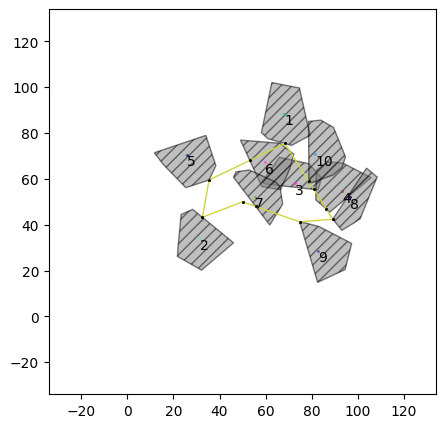

In [13]:
fig

### 2. Neighborhoods in Lat/Lon

#### 2.1 Disk-shape neighborhoods

Create the road map of Xiamen, Fujian, China

In [2]:
XiamenRoads = geoVeRoPy.loadDictionary("../data/Xiamen")

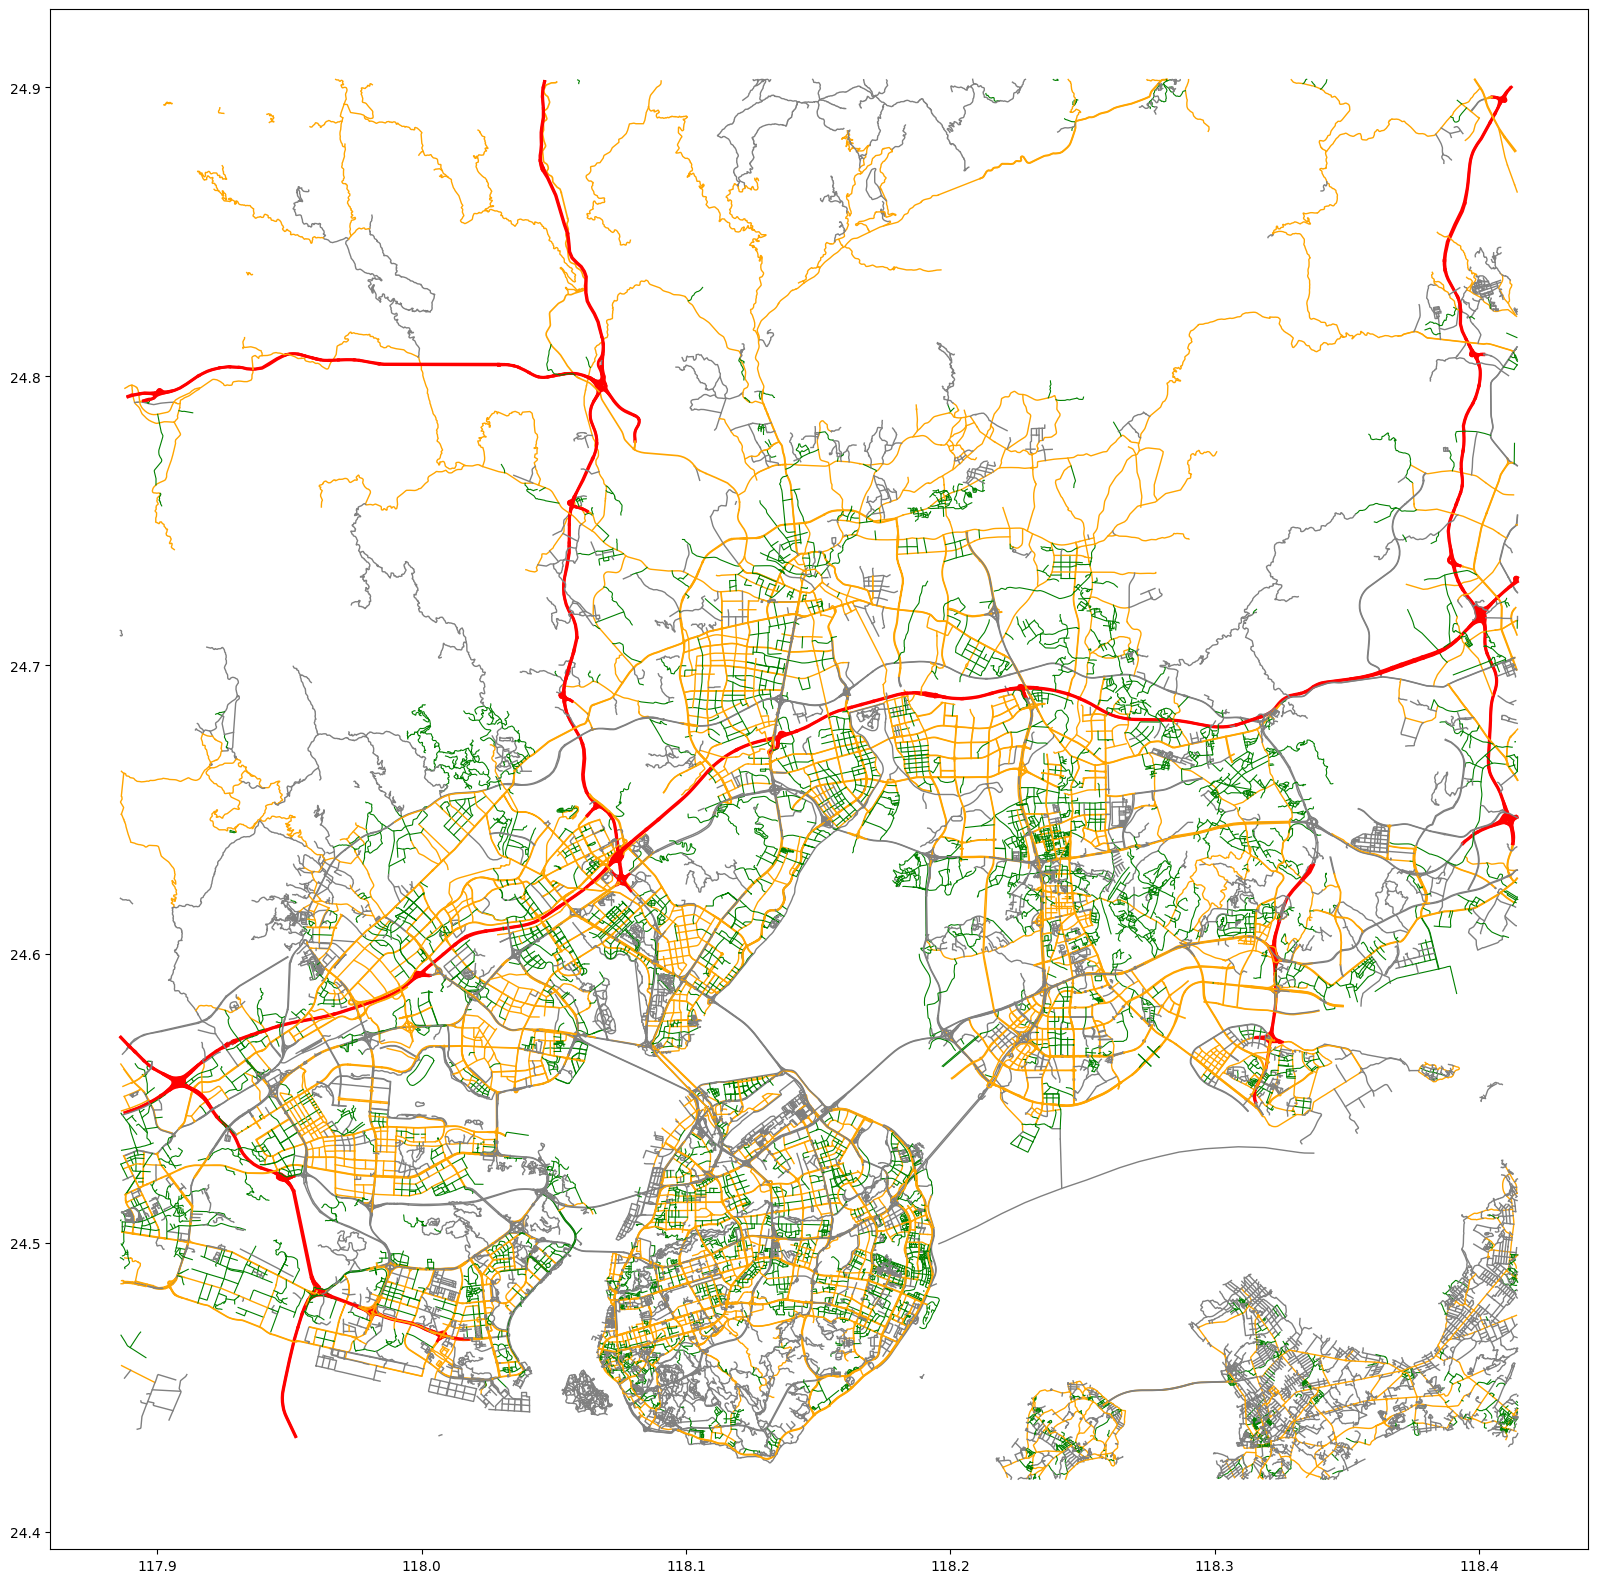

In [3]:
fig, ax = geoVeRoPy.plotRoads(
    roads = XiamenRoads['road'],
    figSize = (None, 20))

In [4]:
nodes = geoVeRoPy.rndNodes(
    nodeIDs = [i for i in range(1, 11)],
    distr = 'RoadNetworkPolyLatLon',
    polyLatLon = XiamenRoads['boundary'],
    roads = XiamenRoads['road'],
    roadClass = ['motorway', 'motorway_link'])

In [3]:
nodes = geoVeRoPy.rndNodes(
    nodeIDs = [i for i in range(1, 11)],
    distr = 'UniformPolyXY',
    polyXY = XiamenRoads['boundary'])

In [4]:
fig, ax = geoVeRoPy.plotNodes(
    fig = fig,
    ax = ax,
    nodes = nodes,
    nodeColor = 'black',
    nodeMarkerSize = 6,
    latLonFlag = True)

NameError: name 'fig' is not defined

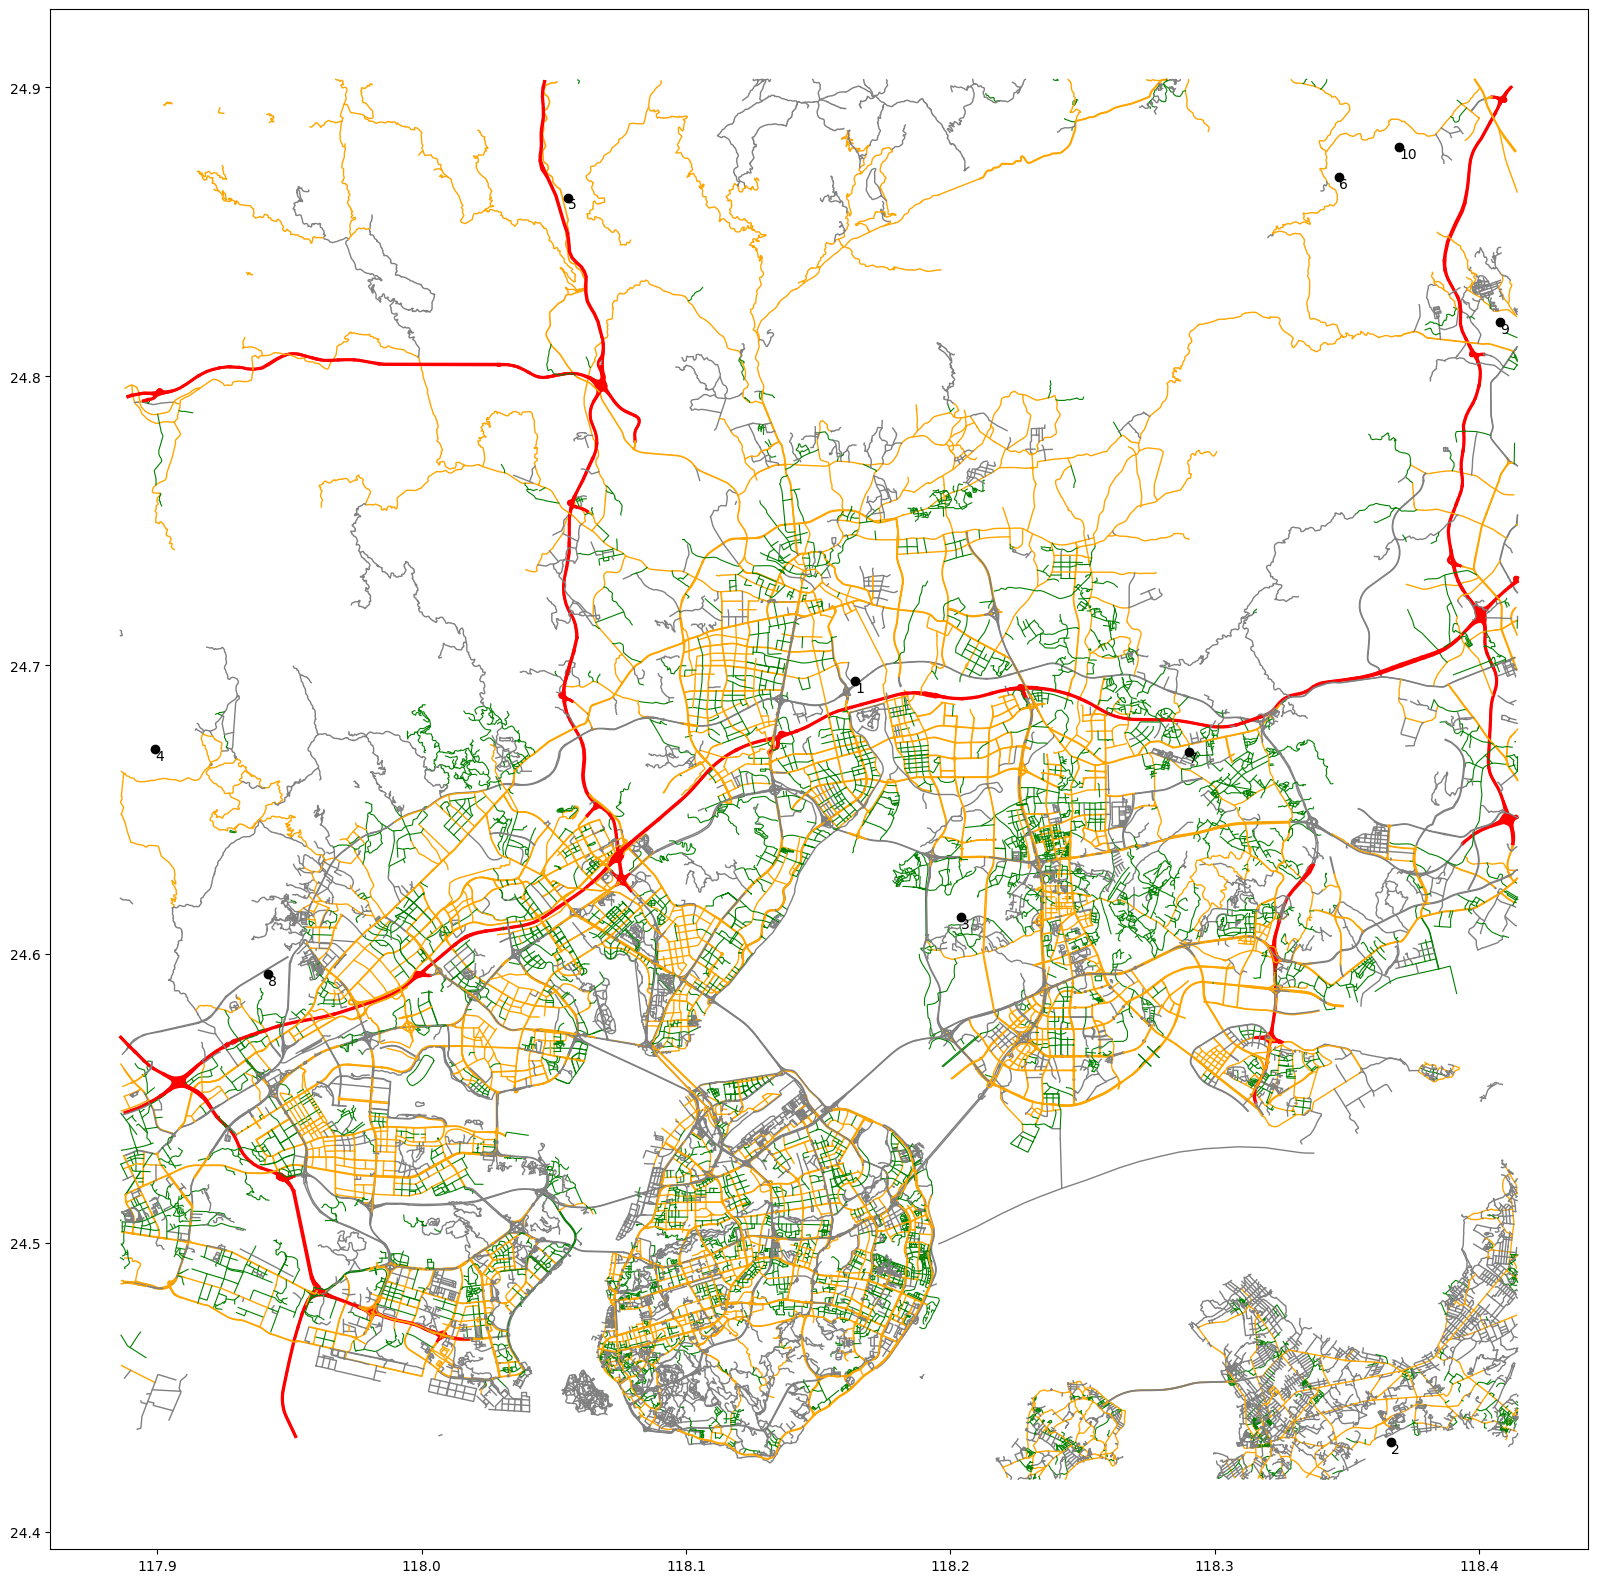

In [6]:
fig

In [ ]:
cetsp = geoVeRoPy.solveCETSP(
    startLoc = (24.5, 118.15),
    endLoc = (24.5, 118.15),
    nodes = nodes,
    neighbor = "CircleLatLon",
    radiusMeter = 1000,
    algo = "Exact")



[0, 9, 3, 10, 4, 8, 1, 5, 7, 6, 2, 11]
---------------------------------------------------------------------------
Residual: 24034.510654962873
Add default cut: - theta >= 2.147 * e[0, 9] + 3.437 * e[9, 3] + 6104.766 * e[3, 10] + 3075.464 * e[10, 4] + 2542.017 * e[4, 8] + 1407.094 * e[8, 1] + 2678.957 * e[1, 5] + 1316.124 * e[5, 7] + 124.287 * e[7, 6] + 6571.401 * e[6, 2] + 208.817 * e[2, 11]
Time Pass: 1.41[s]
Cut: subtour - 13, gbc - 1
So far Best Dist: inf
CurrSol Dist: 203681.75062049902
CurrObj: 179647.23996553617
CurrBound: 75765.27208860291


[0, 9, 3, 10, 4, 8, 1, 5, 7, 6, 2, 11]
---------------------------------------------------------------------------
Duplicated repSeq: [0, 9, 3, 10, 4, 8, 1, 5, 7, 6, 2, 11]


[0, 4, 7, 10, 2, 3, 6, 5, 1, 8, 9, 11]
---------------------------------------------------------------------------
Residual: 32996.847669923896
Add default cut: - theta >= 5711.178 * e[0, 4] + 4210.302 * e[4, 7] + 3601.267 * e[7, 10] + 1158.462 * e[10, 2] + 247.815 *

Residual: 37265.6457981346
Add default cut: - theta >= 5675.154 * e[0, 4] + 4348.837 * e[4, 7] + 2962.661 * e[7, 10] + 8574.494 * e[10, 3] + 2130.203 * e[3, 2] + 0.0 * e[2, 5] + 6358.595 * e[5, 6] + 1784.44 * e[6, 1] + 2628.76 * e[1, 8] + 2495.919 * e[8, 9] + 306.582 * e[9, 11]
Time Pass: 101.59[s]
Cut: subtour - 27, gbc - 15
So far Best Dist: 118304.74963098152
CurrSol Dist: 118463.10217734065
CurrObj: 113135.05054288509
CurrBound: 100832.98487979553


[0, 9, 7, 10, 3, 6, 5, 2, 8, 1, 4, 11]
---------------------------------------------------------------------------
Residual: 26172.36495393514
Add default cut: - theta >= 146.254 * e[0, 9] + 2933.641 * e[9, 7] + 3436.267 * e[7, 10] + 8391.941 * e[10, 3] + 710.967 * e[3, 6] + 2270.503 * e[6, 5] + 1765.343 * e[5, 2] + 3699.356 * e[2, 8] + 722.131 * e[8, 1] + 1887.252 * e[1, 4] + 208.711 * e[4, 11]
Time Pass: 103.2[s]
Cut: subtour - 27, gbc - 16
So far Best Dist: 118304.74963098152
CurrSol Dist: 121664.16737632715
CurrObj: 112039.477227157

In [4]:
cetsp = geoVeRoPy.solveCETSP(
    startLoc = (24.5, 118.15),
    endLoc = (24.5, 118.15),
    nodes = nodes,
    neighbor = "CircleLatLon",
    radiusMeter = 1000,
    algo = "Metaheuristic",
    method = "GA",
    popSize = 100)

D:\Zoo\Gull\geoVeRoPy\demo\../../geoVeRoPy\geoVeRoPy\cetsp.py:100: UserWarning: WARNING: Missing ratios of each local search operator, set to be default.
  warnings.warn("WARNING: Missing ratios of each local search operator, set to be default.")
D:\Zoo\Gull\geoVeRoPy\demo\../../geoVeRoPy\geoVeRoPy\cetsp.py:108: UserWarning: WARNING: Missing stopping criteria, set to be default.
  warnings.warn("WARNING: Missing stopping criteria, set to be default.")


KeyError: 11

In [11]:
cetsp['ofv']

138245.1596979313

In [13]:
fig, ax = geoVeRoPy.plotLocSeq(
    fig = fig,
    ax = ax,
    locSeq = cetsp['path'],
    arrowFlag = False,
    lineColor = 'red',
    lineWidth = 2,
    latLonFlag = True)

In [16]:
for i in nodes:
    polyLatLon = geoVeRoPy.circleByCenterLatLon(
        center = nodes[i]['loc'],
        radius = 1000)
    fig, ax = geoVeRoPy.plotPoly(
        fig = fig,
        ax = ax,
        poly = polyLatLon,
        edgeColor = 'blue',
        edgeWidth = 1,
        fillStyle = '///',
        opacity = 0.1,
        latLonFlag = True)

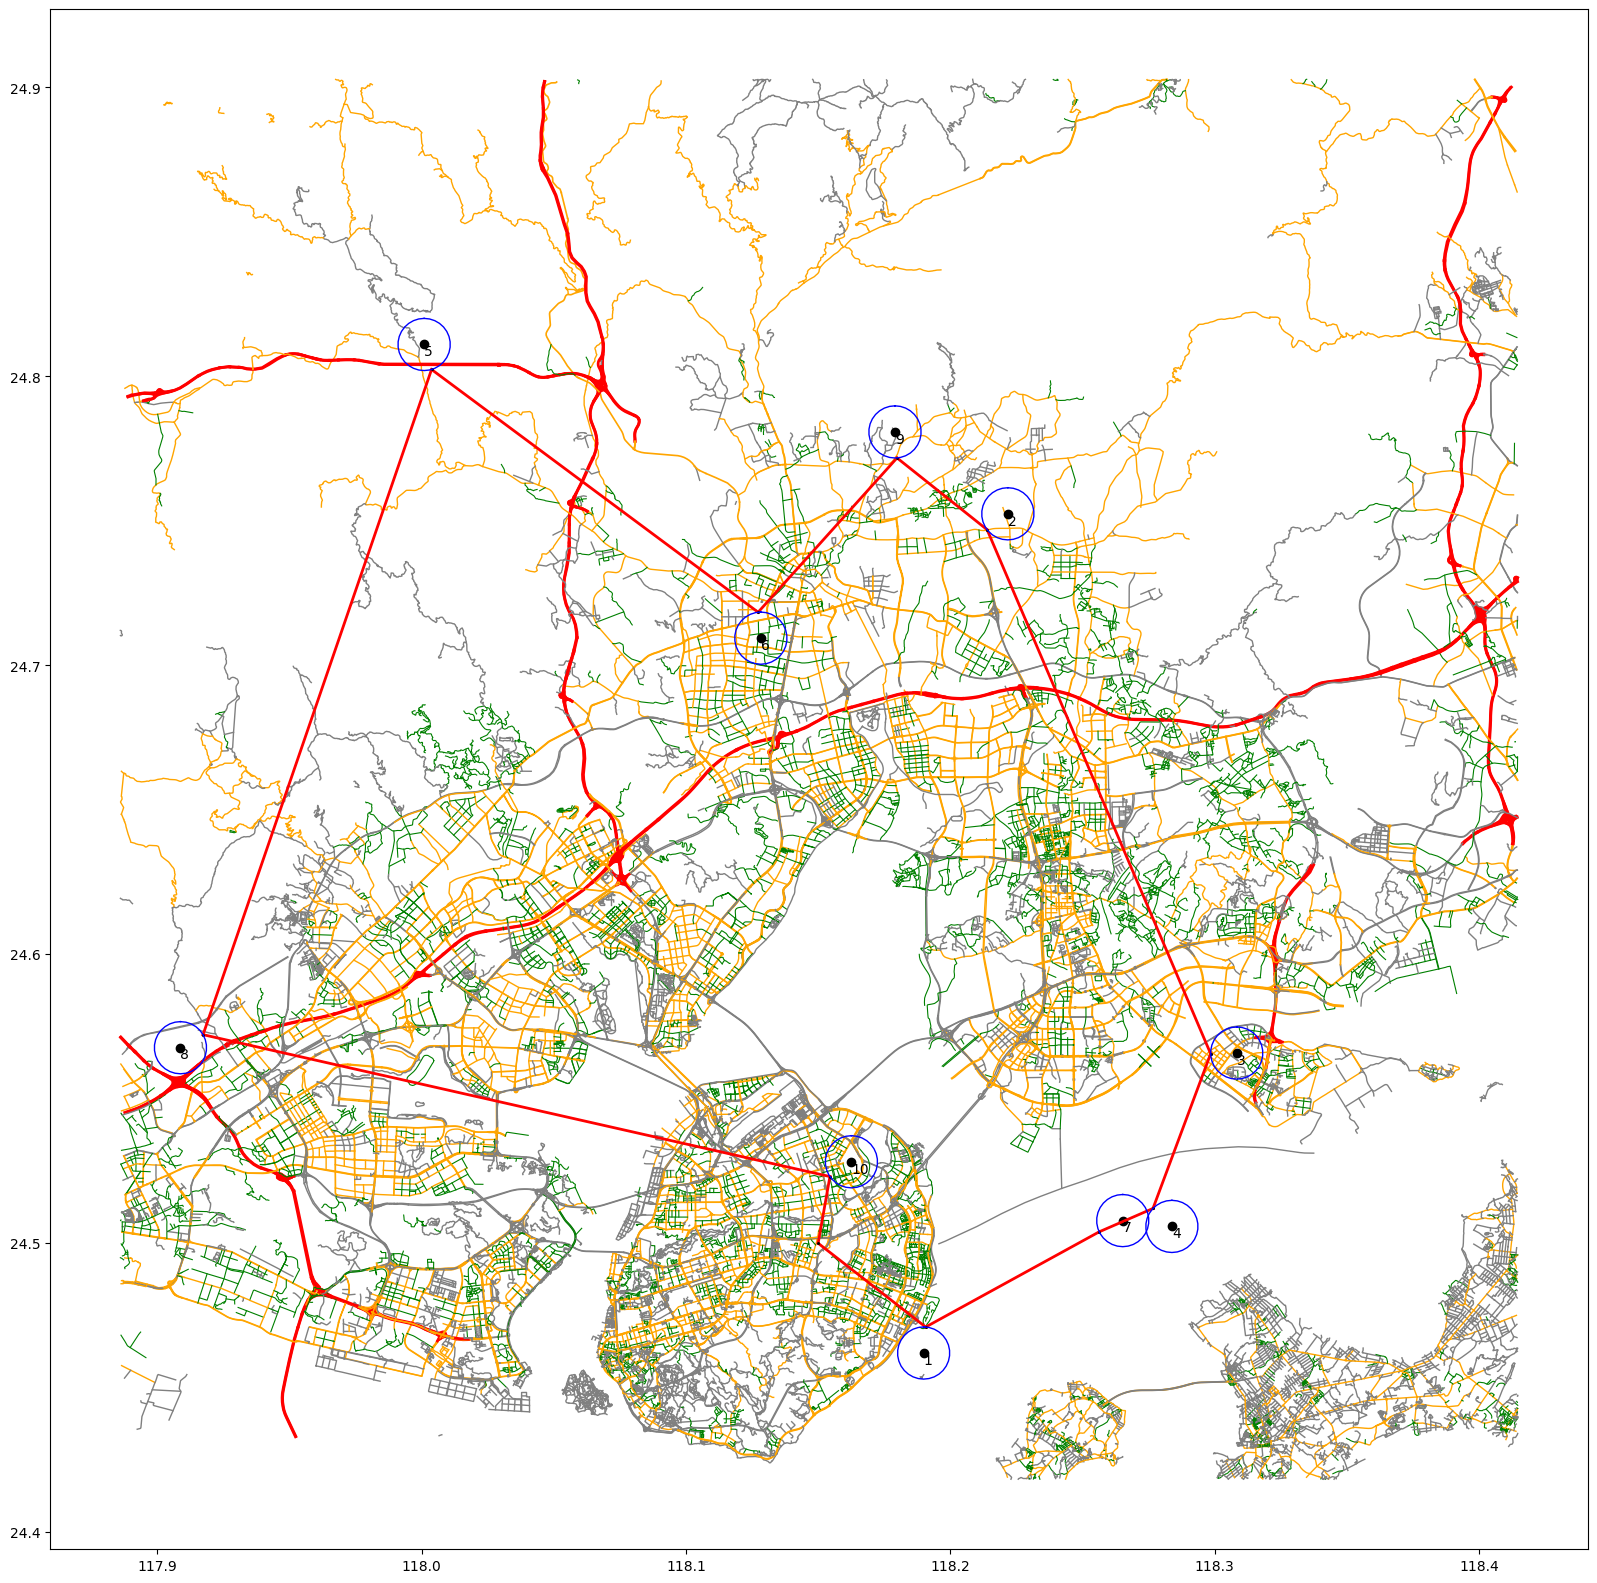

In [17]:
fig